# Contents

---

Methodology
1.   Important Liabraries
2.   Getting Data
3.   EDA
> Basic EDA<br>
> Univariate Analysis<br>
> Bivariate Analysis
4.   Data Preprocessing
> Remove outliers<br>
> Encoding<br>
> Feature Seperating<br>
> SMOTE<br>
> Scaling<br>
> Train-Test split
5. Models
> Logistic Regression<br>
> K-Neighbourest Neighbour<br>
> Decision Tree<br>
> Random Forest<br>
> XG Boost<br>
> Gradient Boosting Machine (GBM)<br>
> Naive Bayes<br>
> Model Comparison <br>
6. Hyperparameter Tuning
> Logistic Regression<br>
> K-Neighbourest Neighbour<br>
> Decision Tree<br>
> Random Forest<br>
> XG Boost<br>
> Gradient Boosting Machine (GBM)<br>
> Naive Bayes<br>
7. Optimized Models
> Logistic Regression<br>
> K-Neighbourest Neighbour<br>
> Decision Tree<br>
> Random Forest<br>
> XG Boost<br>
> Gradient Boosting Machine (GBM)<br>
> Naive Bayes<br>
> Model Comparison <br>
8. Recursive Feature Elimination with Cross-Validation (RFECV)
9. Pipeline
10. Test Data
11. Predictions
12. Submission Data
13. Adding Prediction to Submission csv









#Methodology

---

1. Performed Exploratory Data Analysis like Univariate, Bivariate Analysis through which we deep dived into the features.
2. Performed Data Preprocessing in which Outliers were removed, Encoding, Balancing of Data through SMOTE etc.
3. Splitting of dataset, fitting a model through various ML algorithms like Random Forest, XG Boost, GBM etc.
4. Used SHAP to find Important features of the dataset.
5. Did Hyper parameter Optimization through Grid Search CV
6. Performed Recursive Feature Elimination with Cross Validation (RFECV)
7. Made an ML Pipeline for prediction of Test Dataset.


# 1. Important Liabraries

In [ ]:
#!pip install dython

In [323]:
#!pip install shap

In [334]:
# Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mso
import plotly.express as px
from pandas.plotting import scatter_matrix
# PreProcessing
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Modelling
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import shap
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
#Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# 2. Getting Data

In [ ]:
#Dowloading the Test Dataset from Google Drive

!gdown https://drive.google.com/uc?id=1V5CjjXsifB-2pnNl41qKSnDX7Rmho7s8

Downloading...
From: https://drive.google.com/uc?id=1V5CjjXsifB-2pnNl41qKSnDX7Rmho7s8
To: /content/train.csv
100% 2.81M/2.81M [00:00<00:00, 146MB/s]


In [ ]:
# Reading Train data

data = pd.read_csv("train.csv")

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,retired,married,secondary,no,166,no,yes,unknown,3,jul,211,1,-1,0,unknown,no
1,51,blue-collar,married,primary,no,2995,yes,no,unknown,11,jun,93,2,-1,0,unknown,no
2,50,management,married,tertiary,no,569,no,yes,cellular,18,aug,452,4,-1,0,unknown,no
3,27,admin.,married,secondary,no,73,yes,no,cellular,5,feb,140,1,-1,0,unknown,no
4,38,self-employed,divorced,tertiary,no,6447,no,no,cellular,12,jan,296,1,-1,0,unknown,no


# 3. EDA

## 3.1 Basic EDA

In [ ]:
data.shape

(33908, 17)

In [ ]:
# Checking data types of the columns of train data

data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
# Total number of columns

print("The total number of Columns in Data are :", len(data.columns))

The total number of Columns in Data are : 17


In [ ]:
# Checking categorical variables in the Train Data

data_cat = [var for var in data.columns if data[var].dtype == 'O']
print('There are {} categorical variables in Data \n'.format(len(data_cat)))
print('Categorical Variables are :', data_cat)

There are 10 categorical variables in Data 

Categorical Variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [ ]:
# Checking numerical variables in the Train Data

data_num = [var for var in data.columns if data[var].dtype != 'O']
print('There are {} categorical variables in Data \n'.format(len(data_num)))
print('Categorical Variables are :', data_num)

There are 7 categorical variables in Data 

Categorical Variables are : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [ ]:
# Checking which column has null values in the Train Data

missing = data.isnull().sum()
percent = round((data.isnull().sum() / len(data))*100, 2)
values = {'Count' : missing, 'Percentage' : percent}
pd.DataFrame(values)

,Count,Percentage
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
day,0,0.0


<Axes: >

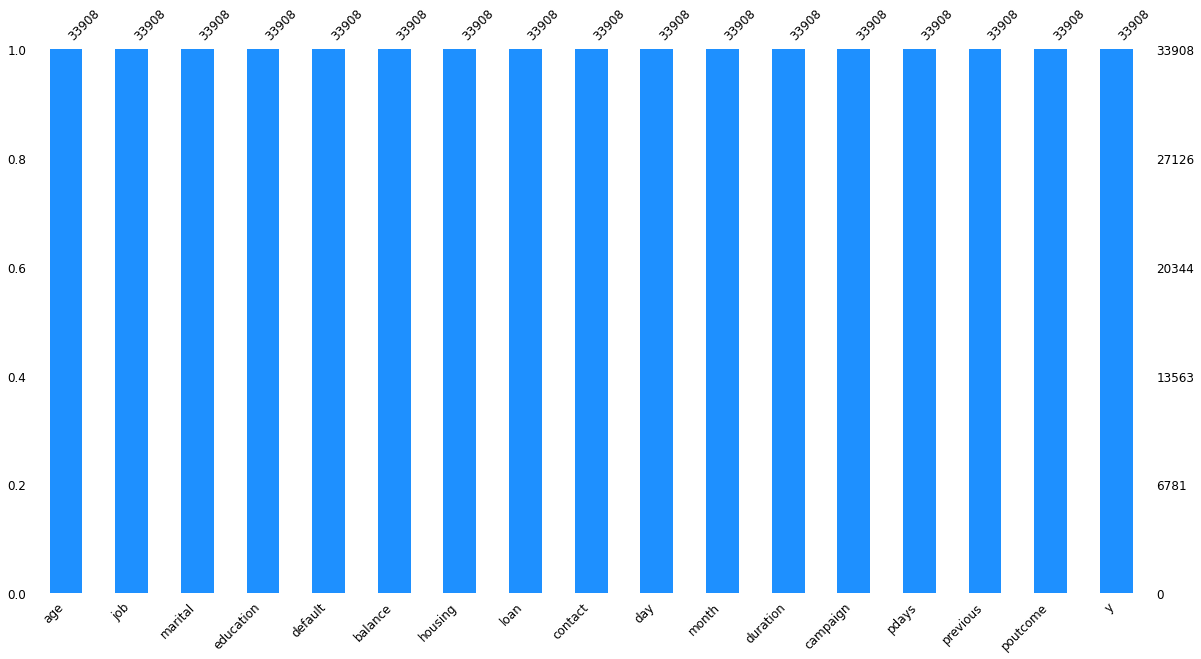

In [ ]:
# plotting non-null values of the columns in the Train Data

mso.bar(data, figsize=(20,10), fontsize=12, color="dodgerblue")

There are No missing values in the Dataset

In [ ]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,33908.000000,33908,33908,33908,33908,33908.000000,33908,33908,33908,33908.000000,33908,33908.000000,33908.000000,33908.000000,33908.000000,33908,33908
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,7250,20399,17346,33315,NaN,18916,28472,21994,NaN,10308,NaN,NaN,NaN,NaN,27710,29941
mean,40.966763,NaN,NaN,NaN,NaN,1370.713136,NaN,NaN,NaN,15.803763,NaN,257.899227,2.752920,40.168515,0.581987,NaN,NaN
std,10.613701,NaN,NaN,NaN,NaN,3111.689069,NaN,NaN,NaN,8.314558,NaN,258.607105,3.068299,99.892114,2.412482,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,74.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,179.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1430.000000,NaN,NaN,NaN,21.000000,NaN,318.000000,3.000000,-1.000000,0.000000,NaN,NaN


From this we can bring out the following observations:-


*   Average Age of the Population is 40 Years.
*   A very high number of people contacted are doing "blue-collar" jobs.
*   Majority of the people are married.
*   More than 50% of the people have completed their Secondary Education.
*   Average Balance of the accounts is 1370 Euros.
*   Approximately 84% of the people have taken a personal loan.
*   Average duration of the call from company to people is 4 minutes.

###3.1.1 Correlation Map

<Axes: >

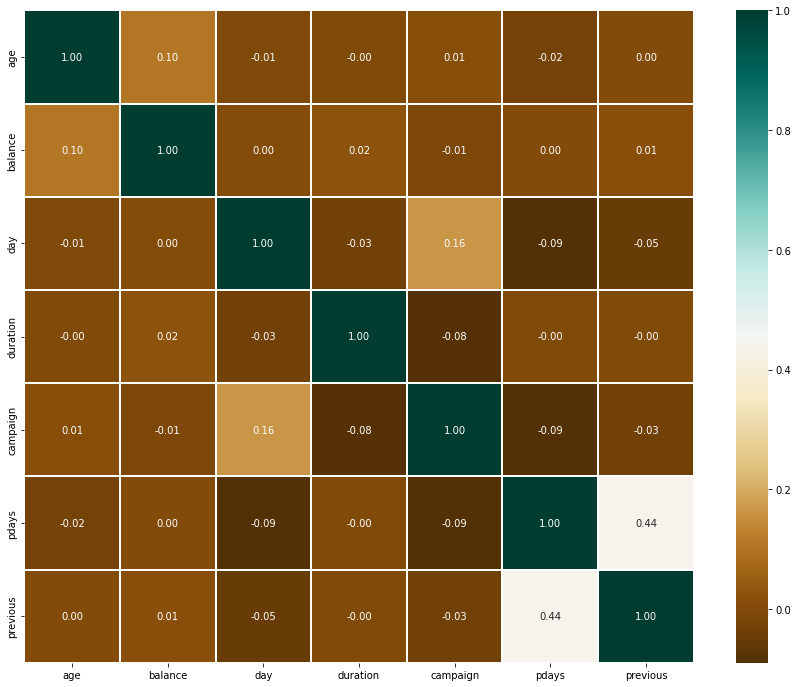

In [ ]:
# Correlation heatmap of numeric variables of the Train Data

plt.figure(figsize = (15,12))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'BrBG', linewidths = 2)

## 3.2 Univariate Analysis

### 3.2.1 Age

In [ ]:
# Number of null values and unique values in Age

print("Null Value in Age :", data['age'].isnull().sum())
print("Number of Unique Values in Age :", data['age'].nunique())

Null Value in Age : 0
Number of Unique Values in Age : 77


In [ ]:
data["age"].describe()

count    33908.000000
mean        40.966763
std         10.613701
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Text(0, 0.5, 'Count')

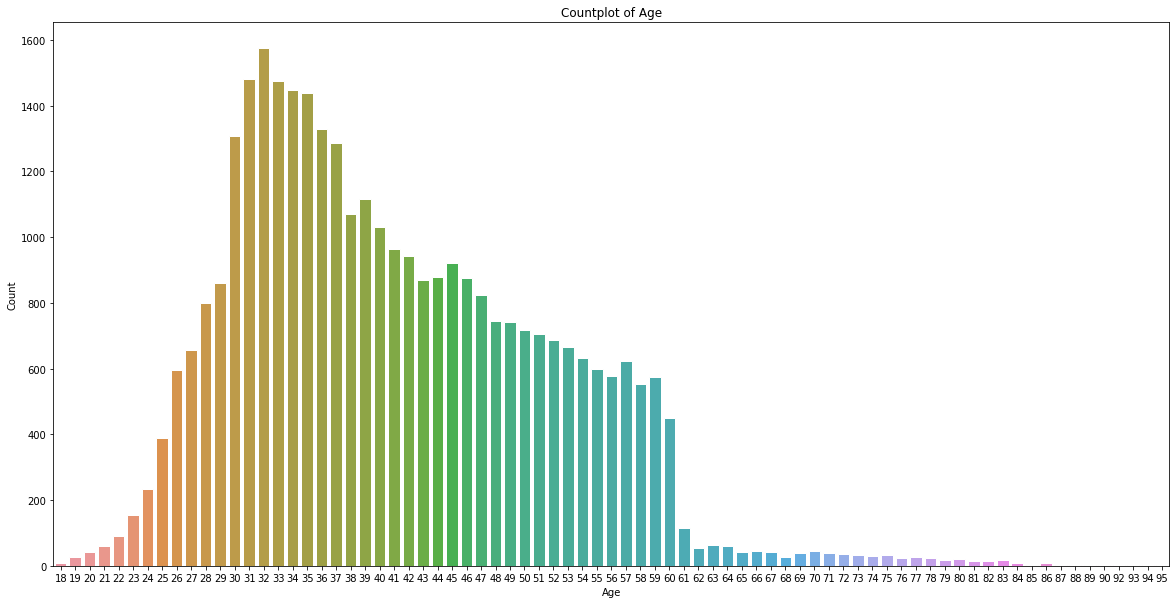

In [ ]:
# Creating Countplot of Age

fig, ax = plt.subplots(figsize = (20,10))
sns.set(style="darkgrid")
sns.countplot(x="age", data = data)
ax.set_title('Countplot of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

Text(0, 0.5, 'Age')

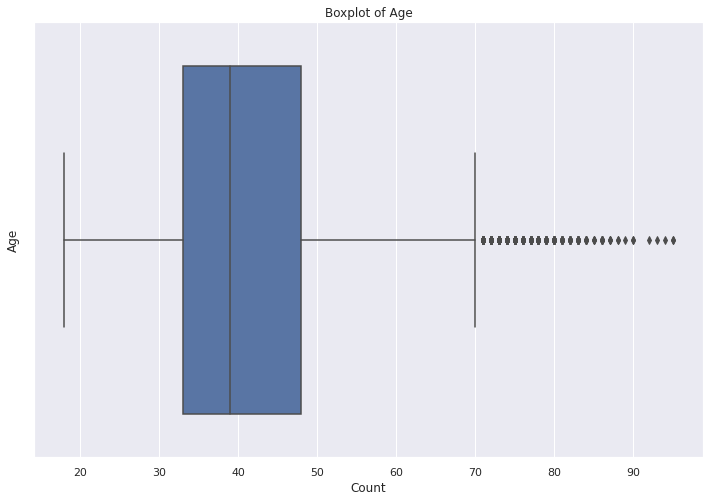

In [ ]:
# Creating Box plot of Age
fig, ax = plt.subplots(figsize = (12,8))
sns.set(style="darkgrid")
sns.boxplot(x="age", data = data)
ax.set_title('Boxplot of Age')
ax.set_xlabel('Count')
ax.set_ylabel('Age')

The above Box plot shows that there are some outliers in the data.<br>
To find how many outliers are there in the data, we will have to calculate Inter Quartile Range (IQR) using the formula: <br>
$IQR = Q3 - Q1$ <br>


---


We can then calculate Lower and Upper Whisker using the formula: <br>
$Lower Whisker = Q1 - 1.5(IQR)$<br>
$Upper Whisker = Q3 + 1.5(IQR)$

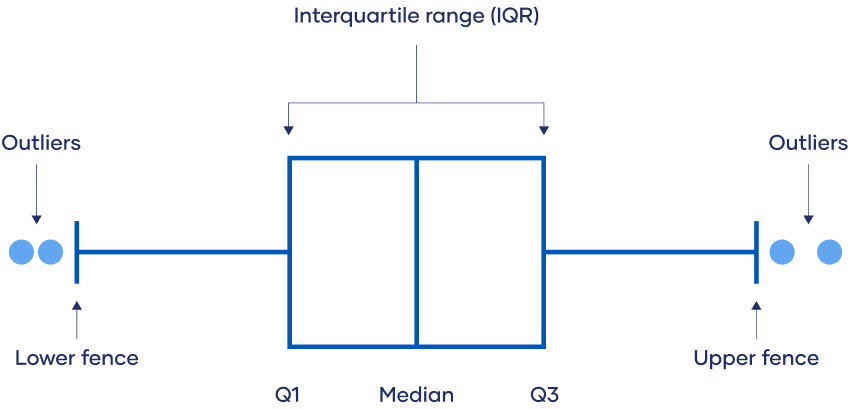

In [ ]:
# function to print out IQR, LW and UW values of the column

def outlier(df, col):
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    LW = df[col].quantile(0.25)-(IQR*1.5)
    UW = df[col].quantile(0.75)+(IQR*1.5)
    print("IQR of", col,": ", IQR)
    print("LW of", col,": ", LW)
    print("UW of", col,": ",  UW)

In [ ]:
# IQR, LW and UW of Boxplot of Age

outlier(data, "age")

IQR of age :  15.0
LW of age :  10.5
UW of age :  70.5


<Axes: xlabel='y', ylabel='age'>

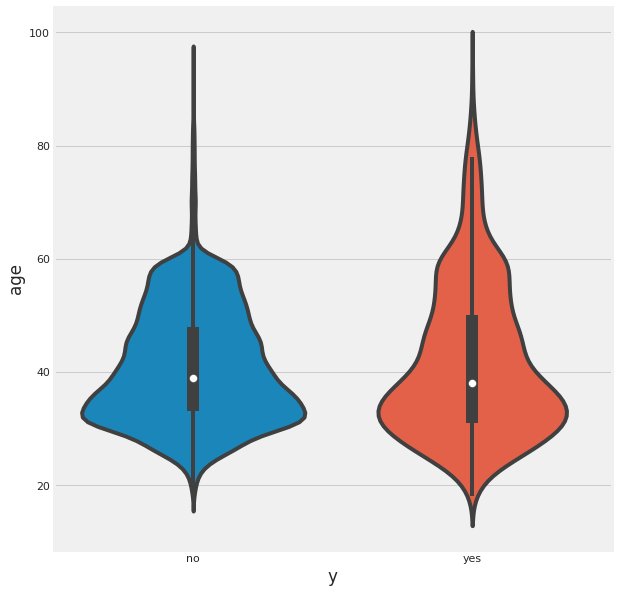

In [ ]:
# Creating Violin plot of Age

plt.figure(figsize = (10, 10))
plt.style.use('fivethirtyeight')
sns.violinplot(x='y', y="age", data=data)

### 3.2.2 Job

In [ ]:
# Number of null values and unique values in Job

print("Null Value in Job :", data['job'].isnull().sum())
print("Number of Unique Values in Job :", data['job'].nunique())

Null Value in Job : 0
Number of Unique Values in Job : 12


In [ ]:
data['job'].unique()

array(['retired', 'blue-collar', 'management', 'admin.', 'self-employed',
       'technician', 'entrepreneur', 'housemaid', 'services',
       'unemployed', 'student', 'unknown'], dtype=object)

In [ ]:
# Value Counts and percentage of column

print("Job:")
count = data["job"].value_counts()
percent = round((data['job'].value_counts() / len(data))*100, 2)
values = {'Count' : count, 'Percentage' : percent}
pd.DataFrame(values)

Job:


,Count,Percentage
blue-collar,7250,21.38
management,7143,21.07
technician,5724,16.88
admin.,3860,11.38
services,3104,9.15
retired,1677,4.95
self-employed,1210,3.57
entrepreneur,1110,3.27
unemployed,981,2.89
housemaid,934,2.75


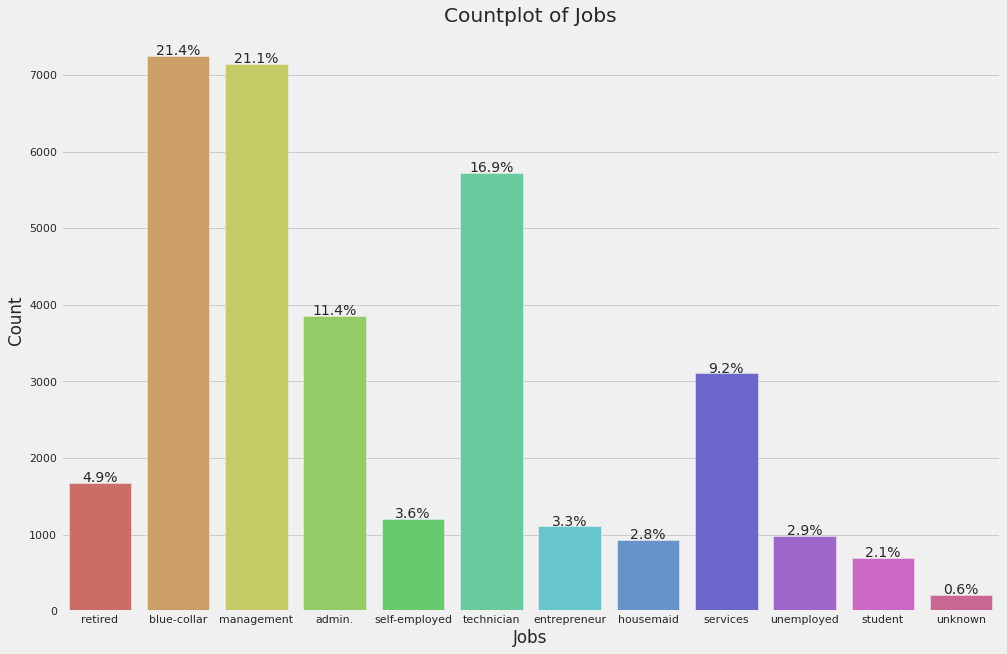

In [ ]:
# Plotting count of Jobs

fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x = "job", data = data, palette = "hls")
ax.set_title('Countplot of Jobs')
ax.set_xlabel('Jobs')
ax.set_ylabel('Count')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+10)
    ax.annotate(percentage, (x, y),ha='center')

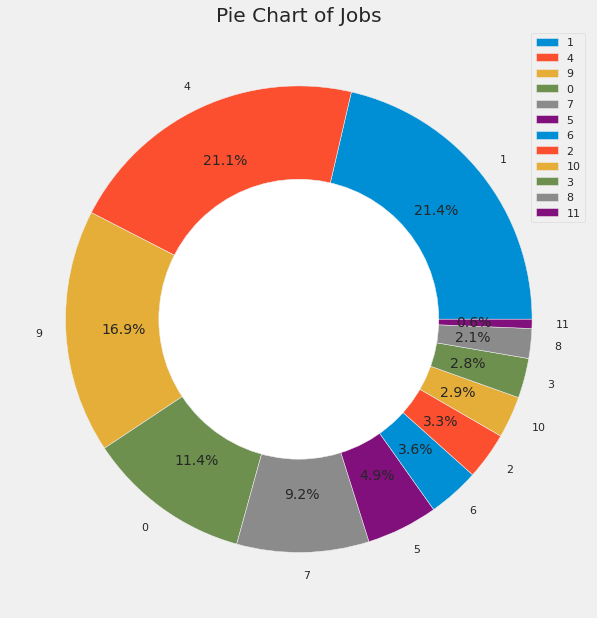

In [282]:
# Pie chart of Jobs

pie_data = data["job"].value_counts()
plt.subplots(figsize = (10,10))
plt.pie(pie_data, labels = pie_data.index, autopct='%1.1f%%', pctdistance=0.75)
plt.title('Pie Chart of Jobs')
plt.legend()
centre_circle = plt.Circle((0, 0), 0.60, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

### 3.2.3 Marital

In [ ]:
# Number of null values and unique values in Marital column

print("Null Value in Marital :", data['marital'].isnull().sum())
print("Number of Unique Values in Marital :", data['marital'].nunique())

Null Value in Marital : 0
Number of Unique Values in Marital : 3


In [ ]:
data['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [ ]:
# Value Counts and percentage of Marital

print("Marital:")
count = data["marital"].value_counts()
percent = round((data['marital'].value_counts() / len(data))*100, 2)
values = {'Count' : count, 'Percentage' : percent}
pd.DataFrame(values)

Marital:


,Count,Percentage
married,20399,60.16
single,9601,28.31
divorced,3908,11.53


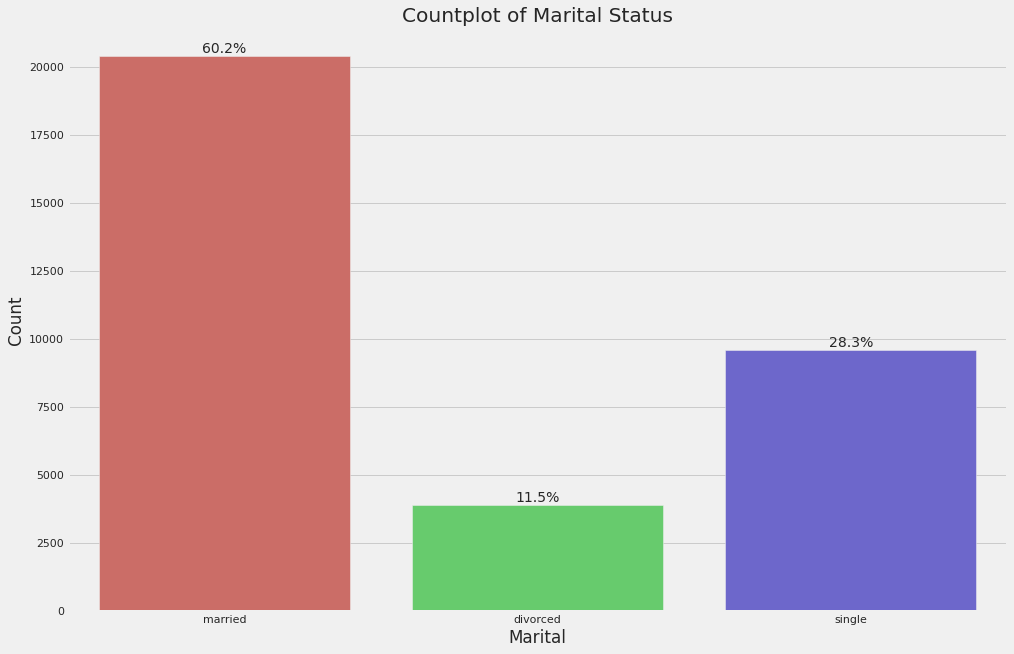

In [ ]:
# Plotting count of Marital column

fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x = "marital", data = data, palette = "hls")
ax.set_title('Countplot of Marital Status')
ax.set_xlabel('Marital')
ax.set_ylabel('Count')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+100)
    ax.annotate(percentage, (x, y),ha='center')

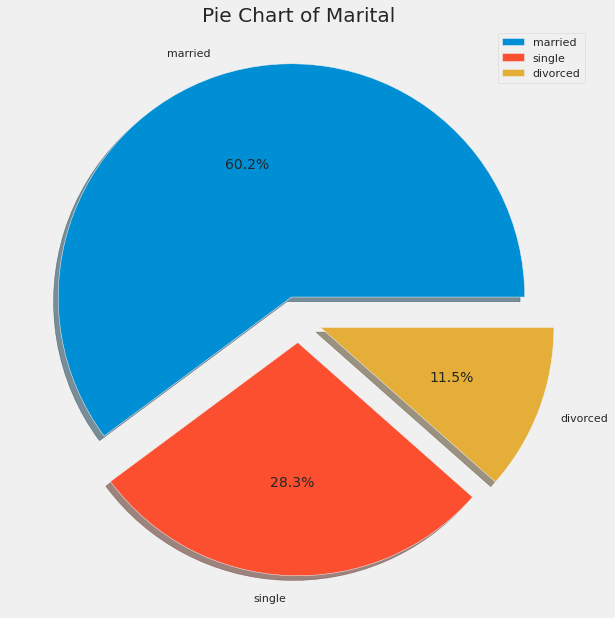

In [ ]:
# Pie chart of Marital

pie_data = data["marital"].value_counts()
plt.subplots(figsize = (15,10))
plt.pie(pie_data, labels = pie_data.index, explode = [0.1, 0.1, 0.1], shadow = True, autopct='%1.1f%%')
plt.title('Pie Chart of Marital')
plt.legend()

### 3.2.4 Education

In [ ]:
# Number of null values and unique values in Education

print("Null Value in Education :", data['education'].isnull().sum())
print("Number of Unique Values in Education :", data['education'].nunique())

Null Value in Education : 0
Number of Unique Values in Education : 4


In [ ]:
data['education'].unique()

array(['secondary', 'primary', 'tertiary', 'unknown'], dtype=object)

In [ ]:
# Value Counts and percentage of Education

print("Education:\n")
count = data["education"].value_counts()
percent = round((data['education'].value_counts() / len(data))*100, 2)
values = {'Count' : count, 'Percentage' : percent}
pd.DataFrame(values)

Education:



,Count,Percentage
secondary,17346,51.16
tertiary,10079,29.72
primary,5098,15.03
unknown,1385,4.08


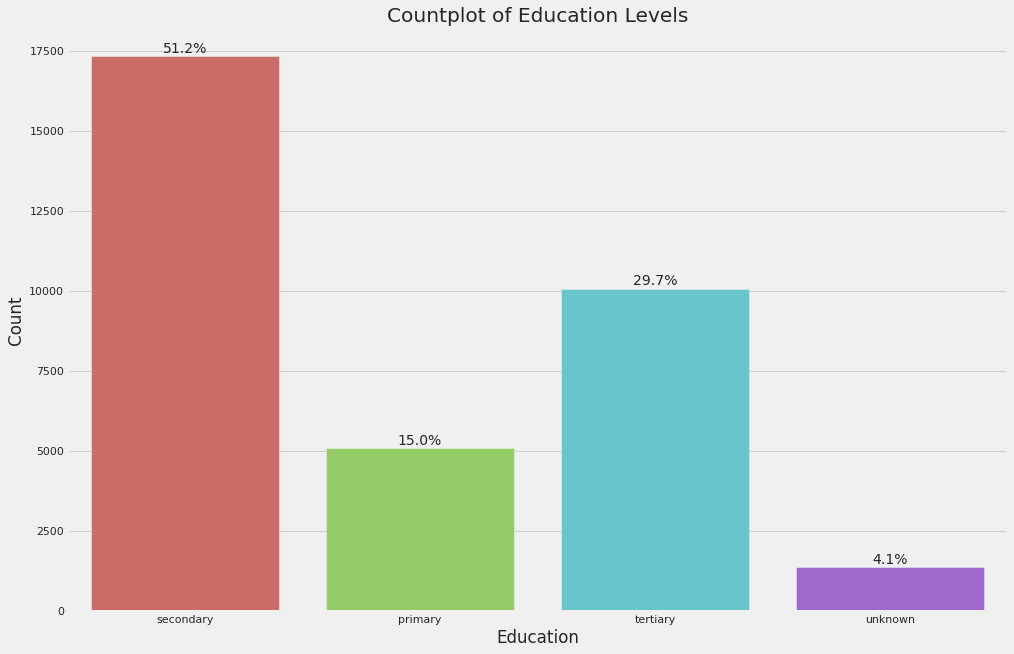

In [ ]:
# Plotting count of Education Levels

fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x = "education", data = data, palette = "hls")
ax.set_title('Countplot of Education Levels')
ax.set_xlabel('Education')
ax.set_ylabel('Count')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+100)
    ax.annotate(percentage, (x, y),ha='center')

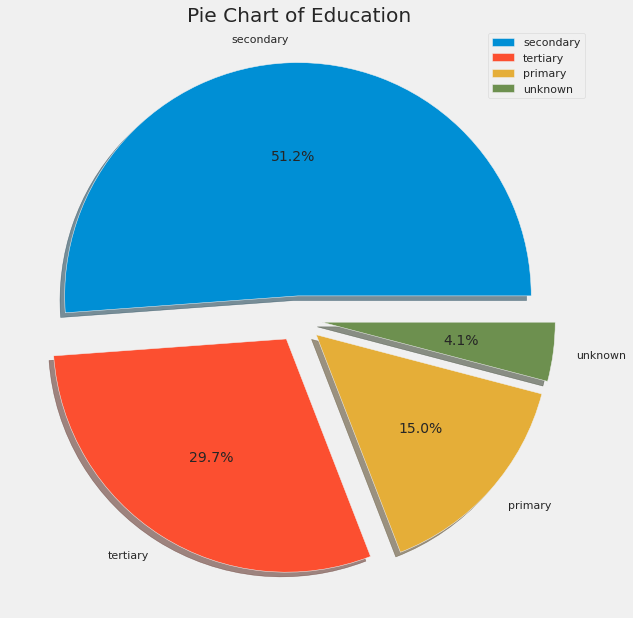

In [ ]:
# Pie chart of Education

pie_data = data["education"].value_counts()
plt.subplots(figsize = (15,10))
plt.pie(pie_data, labels = pie_data.index, explode = [0.1, 0.1, 0.1, 0.1], shadow = True, autopct='%1.1f%%')
plt.title('Pie Chart of Education')
plt.legend()

### 3.2.5 Default

In [ ]:
# Number of null values and unique values in Default

print("Null Value in Default :", data['default'].isnull().sum())
print("Number of Unique Values in Default :", data['default'].nunique())

Null Value in Default : 0
Number of Unique Values in Default : 2


In [ ]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
# Value Counts and percentage of Default

print("Default:\n")
count = data["default"].value_counts()
percent = round((data['default'].value_counts() / len(data))*100, 2)
values = {'Count' : count, 'Percentage' : percent}
pd.DataFrame(values)

Default:



,Count,Percentage
no,33315,98.25
yes,593,1.75


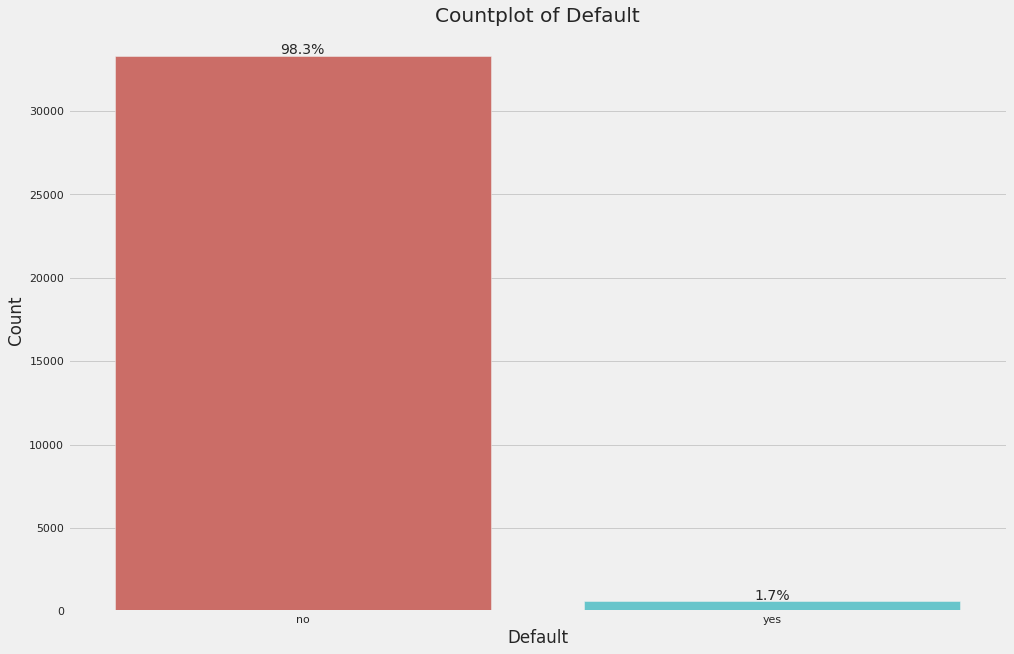

In [ ]:
# Plotting count of Default

fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x = "default", data = data, palette = "hls")
ax.set_title('Countplot of Default')
ax.set_xlabel('Default')
ax.set_ylabel('Count')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+100)
    ax.annotate(percentage, (x, y),ha='center')

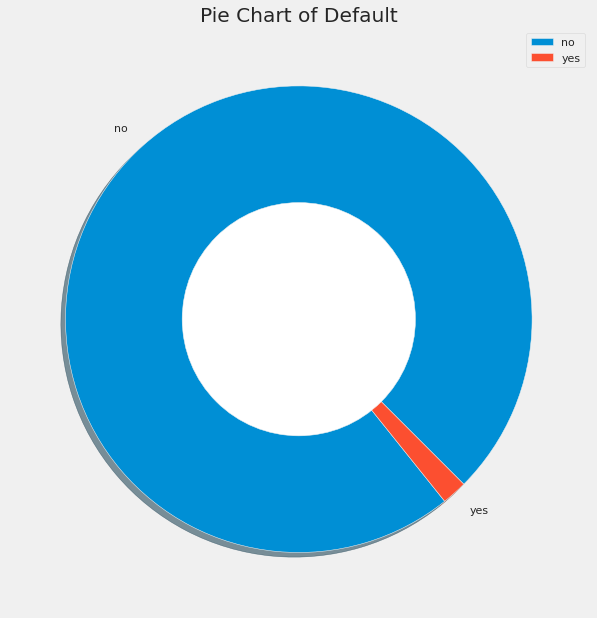

In [ ]:
# Pie chart of 

pie_data = data["default"].value_counts()
plt.subplots(figsize = (15,10))
plt.pie(pie_data, labels = pie_data.index, shadow = True, startangle = 315)
plt.title('Pie Chart of Default')
plt.legend()
centre_circle = plt.Circle((0, 0), 0.50, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

### 3.2.6 Balance

In [ ]:
# Number of null values and unique values in Balance

print("Null Value in Balance :", data['balance'].isnull().sum())
print("Number of Unique Values in Balance :", data['balance'].nunique())

Null Value in Balance : 0
Number of Unique Values in Balance : 6434


In [ ]:
data["balance"].describe()

count     33908.000000
mean       1370.713136
std        3111.689069
min       -8019.000000
25%          74.000000
50%         450.000000
75%        1430.000000
max      102127.000000
Name: balance, dtype: float64

As Number of Unique values is very high for this column, we cannot make a Count plot for this.

Text(0, 0.5, 'Balance')

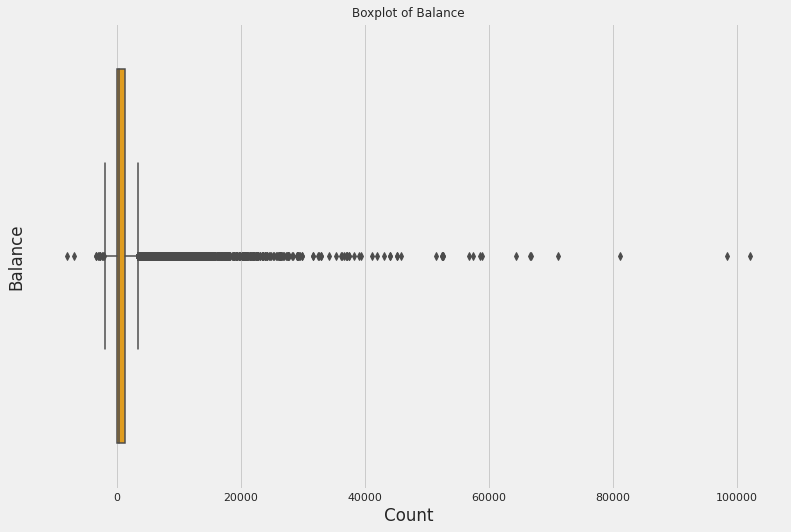

In [ ]:
# Creating Box plot of Balance

fig, ax = plt.subplots(figsize = (12,8))
sns.set(style="darkgrid")
sns.boxplot(x="balance", data = data, color='orange')
ax.set_title('Boxplot of Balance')
ax.set_xlabel('Count')
ax.set_ylabel('Balance')

In [ ]:
# IQR, LW and UW of Boxplot of Balance

outlier(data, "balance")

IQR of balance :  1356.0
LW of balance :  -1960.0
UW of balance :  3464.0


<Axes: xlabel='y', ylabel='balance'>

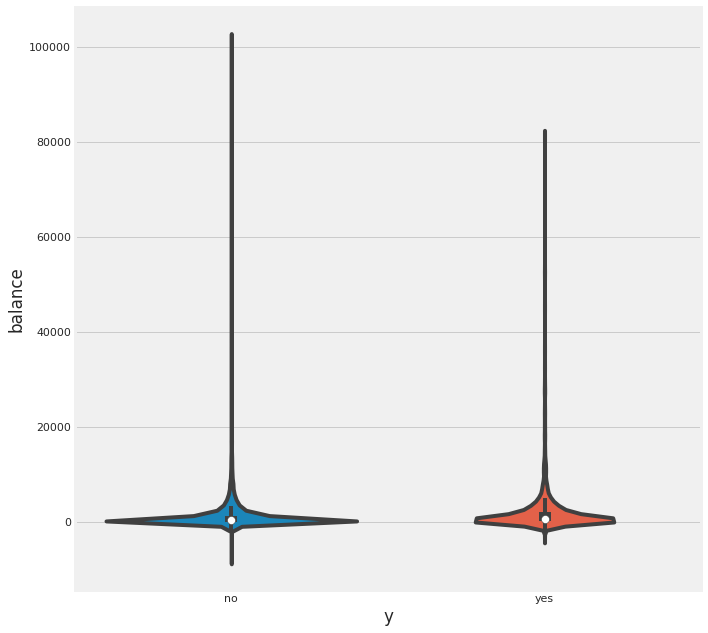

In [ ]:
# Creating Violin plot of Balance

plt.figure(figsize = (10, 10))
plt.style.use('fivethirtyeight')
sns.violinplot(x='y', y="balance", data=data)

### 3.2.7 Housing

In [ ]:
# Number of null values and unique values in Housing

print("Null Value in Housing :", data['housing'].isnull().sum())
print("Number of Unique Values in Housing :", data['housing'].nunique())

Null Value in Housing : 0
Number of Unique Values in Housing : 2


In [ ]:
data['housing'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
# Value Counts and percentage of Housing

print("Housing:\n")
count = data["housing"].value_counts()
percent = round((data['housing'].value_counts() / len(data))*100, 2)
values = {'Count' : count, 'Percentage' : percent}
pd.DataFrame(values)

Housing:



,Count,Percentage
yes,18916,55.79
no,14992,44.21


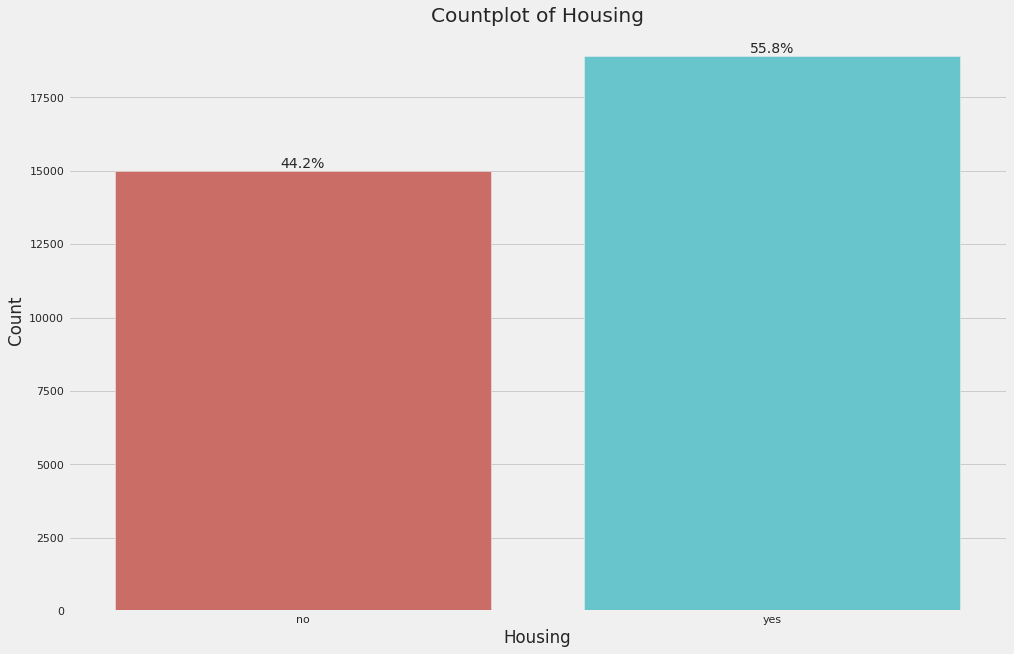

In [ ]:
# Plotting count of Housing

fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x = "housing", data = data, palette = "hls")
ax.set_title('Countplot of Housing')
ax.set_xlabel('Housing')
ax.set_ylabel('Count')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+100)
    ax.annotate(percentage, (x, y),ha='center')

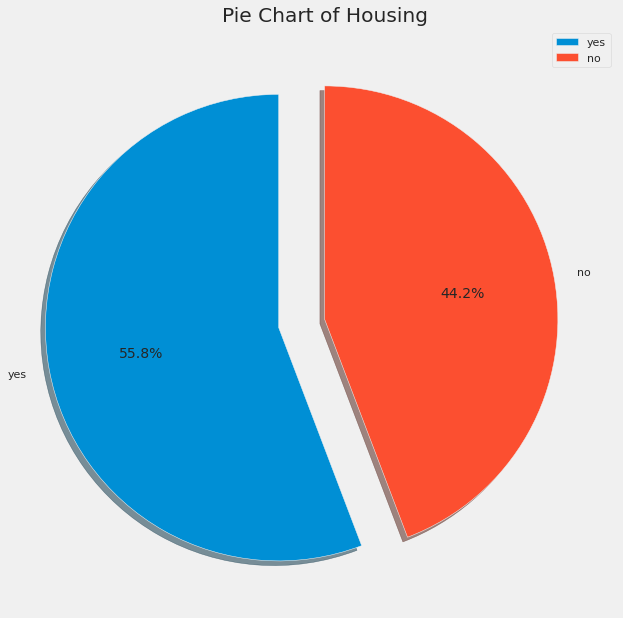

In [ ]:
# Pie chart of Housing

pie_data = data["housing"].value_counts()
plt.subplots(figsize = (15,10))
plt.pie(pie_data, labels = pie_data.index, explode = [0.2, 0], shadow = True, autopct='%1.1f%%', startangle = 90)
plt.title('Pie Chart of Housing')
plt.legend()

### 3.2.8 Loan

In [ ]:
# Number of null values and unique values in Loan

print("Null Value in Loan :", data['loan'].isnull().sum())
print("Number of Unique Values in Loan :", data['loan'].nunique())

Null Value in Loan : 0
Number of Unique Values in Loan : 2


In [ ]:
data['loan'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# Value Counts and percentage of Loan

print("Loan:\n")
count = data["loan"].value_counts()
percent = round((data['loan'].value_counts() / len(data))*100, 2)
values = {'Count' : count, 'Percentage' : percent}
pd.DataFrame(values)

Loan:



,Count,Percentage
no,28472,83.97
yes,5436,16.03


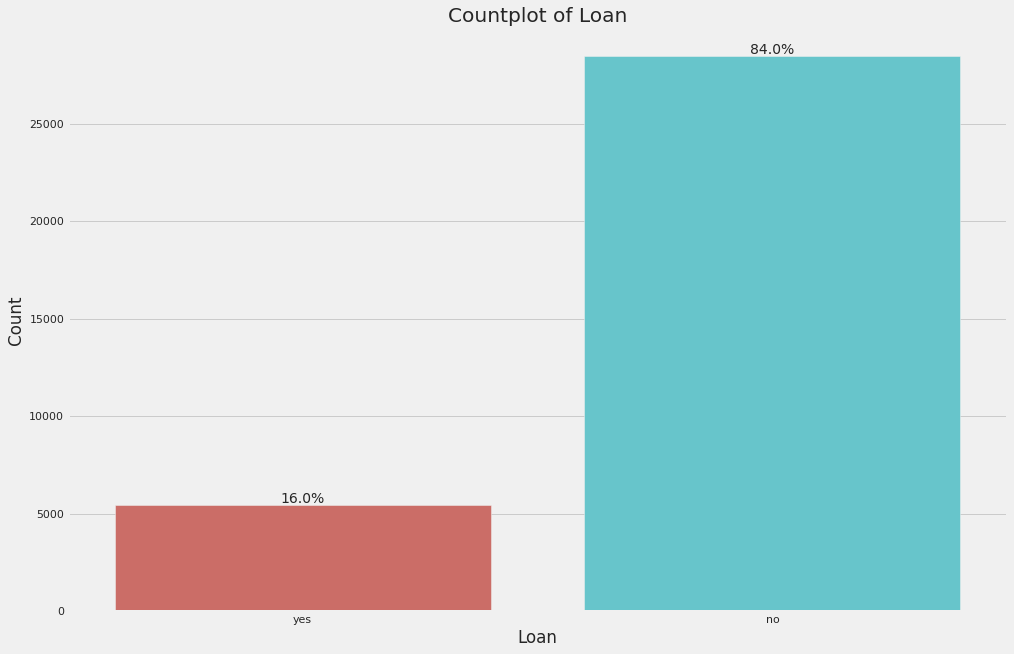

In [ ]:
# Plotting count of Loan

fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x = "loan", data = data, palette = "hls")
ax.set_title('Countplot of Loan')
ax.set_xlabel('Loan')
ax.set_ylabel('Count')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+100)
    ax.annotate(percentage, (x, y),ha='center')

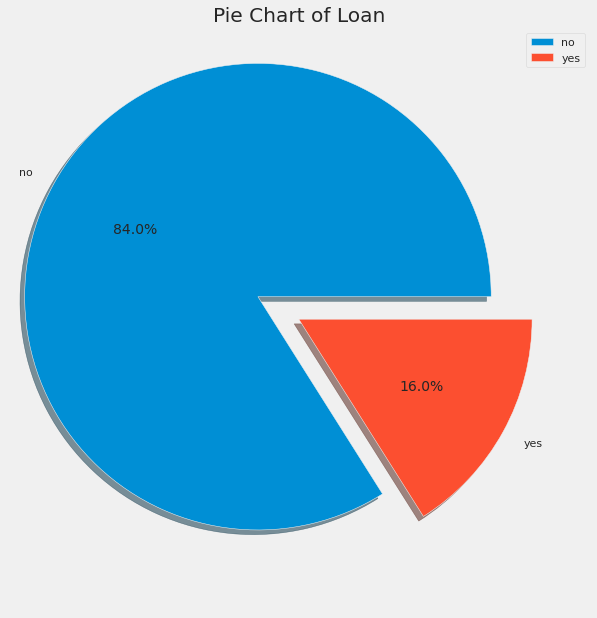

In [ ]:
# Pie chart of Loan

pie_data = data["loan"].value_counts()
plt.subplots(figsize = (15,10))
plt.pie(pie_data, labels = pie_data.index, explode = [0.2, 0], shadow = True, autopct='%1.1f%%')
plt.title('Pie Chart of Loan')
plt.legend()

### 3.2.9 Contact

In [ ]:
# Number of null values and unique values in Contact

print("Null Value in Contact :", data['contact'].isnull().sum())
print("Number of Unique Values in Contact :", data['contact'].nunique())

Null Value in Contact : 0
Number of Unique Values in Contact : 3


In [ ]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
# Value Counts and percentage of Contact

print("Contact:\n")
count = data["contact"].value_counts()
percent = round((data['contact'].value_counts() / len(data))*100, 2)
values = {'Count' : count, 'Percentage' : percent}
pd.DataFrame(values)

Contact:



,Count,Percentage
cellular,21994,64.86
unknown,9750,28.75
telephone,2164,6.38


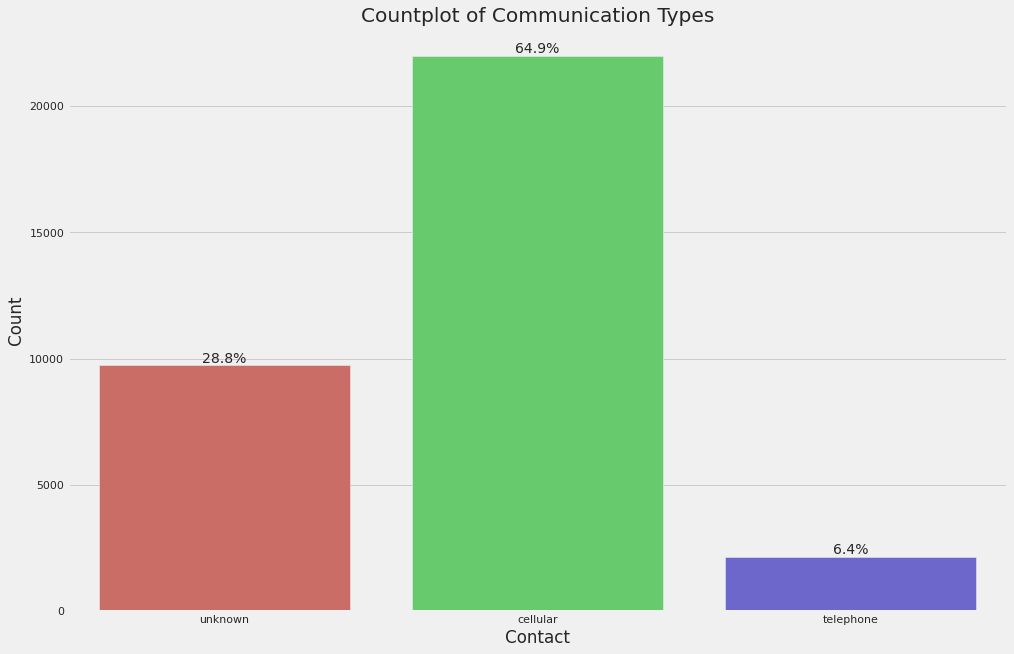

In [ ]:
# Plotting count of Contact

fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x = "contact", data = data, palette = "hls")
ax.set_title('Countplot of Communication Types')
ax.set_xlabel('Contact')
ax.set_ylabel('Count')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+100)
    ax.annotate(percentage, (x, y),ha='center')

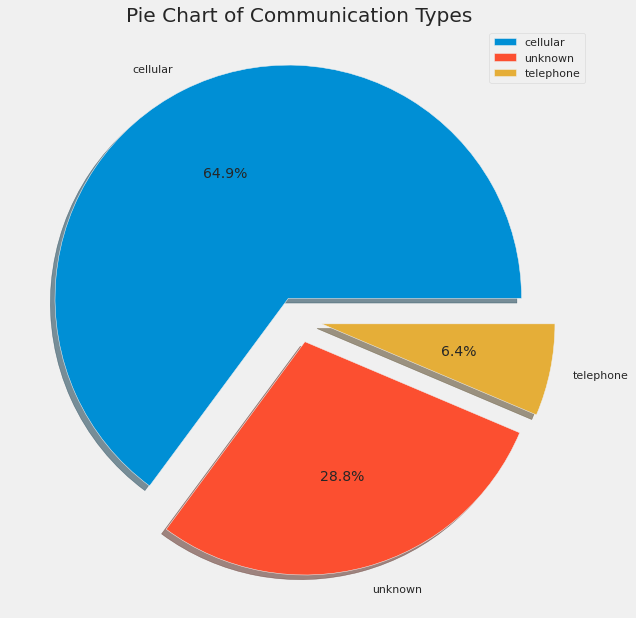

In [ ]:
# Pie chart of Contact

pie_data = data["contact"].value_counts()
plt.subplots(figsize = (15,10))
plt.pie(pie_data, labels = pie_data.index, explode = [0.1, 0.1, 0.1], shadow = True, autopct='%1.1f%%')
plt.title('Pie Chart of Communication Types')
plt.legend()

### 3.2.10 Day

In [ ]:
# Number of null values and unique values in Day

print("Null Value in Day :", data['day'].isnull().sum())
print("Number of Unique Values in Day :", data['day'].nunique())

Null Value in Day : 0
Number of Unique Values in Day : 31


In [ ]:
data["day"].describe()

count    33908.000000
mean        15.803763
std          8.314558
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

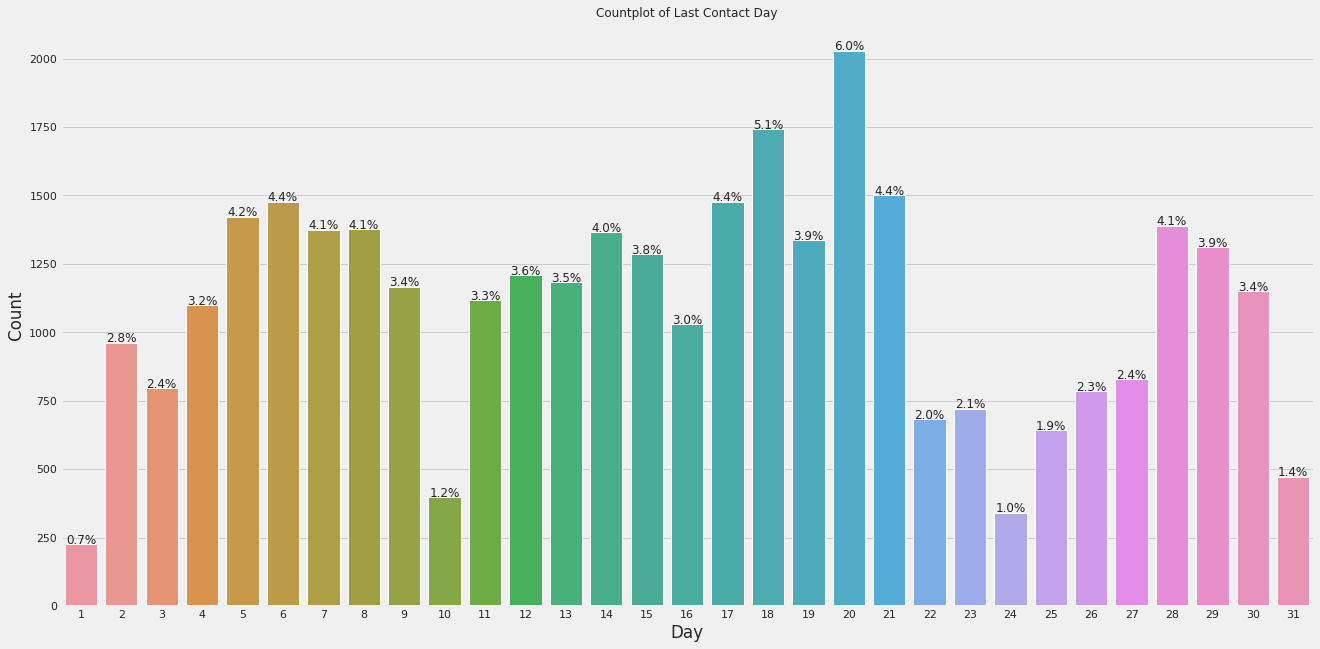

In [ ]:
# Creating Countplot of Day

fig, ax = plt.subplots(figsize = (20,10))
sns.set(style="darkgrid")
sns.countplot(x="day", data = data)
ax.set_title('Countplot of Last Contact Day')
ax.set_xlabel('Day')
ax.set_ylabel('Count')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+2)
    ax.annotate(percentage, (x, y),ha='center')

Text(0, 0.5, 'Day')

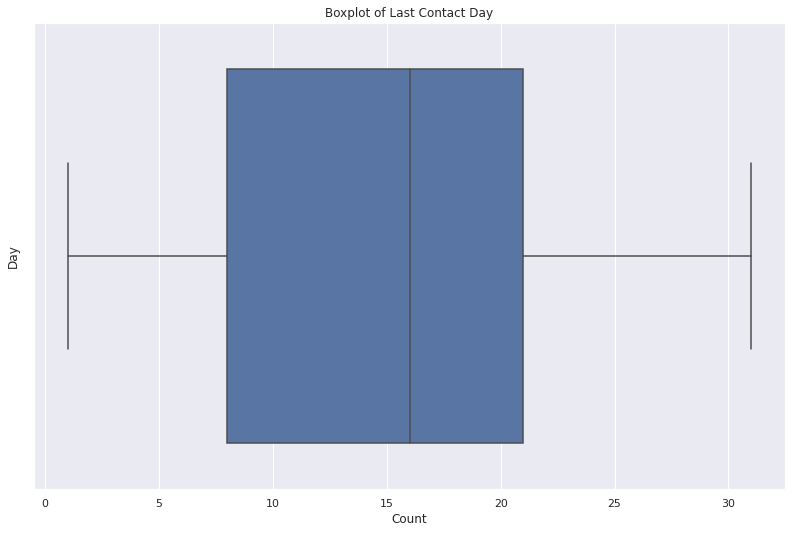

In [ ]:
# Creating Box plot of Day
fig, ax = plt.subplots(figsize = (12,8))
sns.set(style="darkgrid")
sns.boxplot(x="day", data = data)
ax.set_title('Boxplot of Last Contact Day')
ax.set_xlabel('Count')
ax.set_ylabel('Day')

In [ ]:
# IQR, LW and UW of Boxplot of Day

outlier(data, "day")

IQR of day :  13.0
LW of day :  -11.5
UW of day :  40.5


Since all the data points of this particular column lie within the Lower Whisker and Upper Whisker Range, there are no Outliers in this.

<Axes: xlabel='y', ylabel='day'>

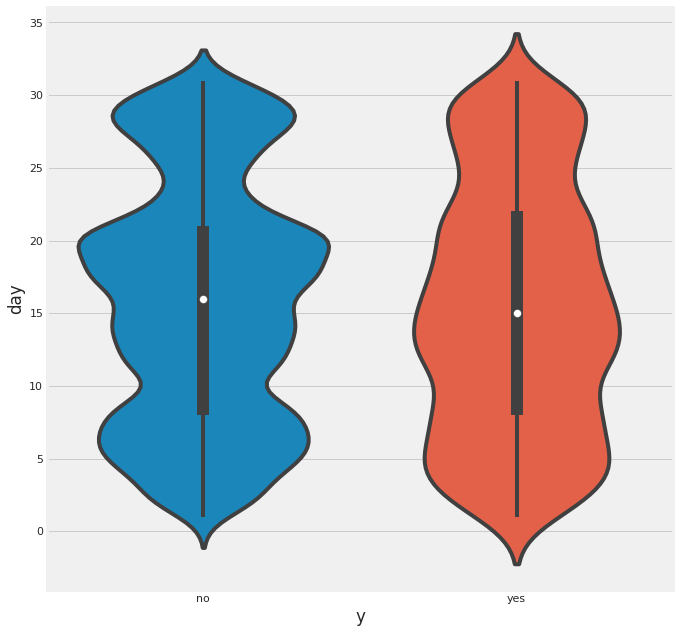

In [ ]:
# Creating Violin plot of Day

plt.figure(figsize = (10, 10))
plt.style.use('fivethirtyeight')
sns.violinplot(x='y', y="day", data=data)

### 3.2.11 Month

In [ ]:
# Number of null values and unique values in Month

print("Null Value in Month :", data['month'].isnull().sum())
print("Number of Unique Values in Month :", data['month'].nunique())

Null Value in Month : 0
Number of Unique Values in Month : 12


In [ ]:
data['month'].unique()

array(['jul', 'jun', 'aug', 'feb', 'jan', 'may', 'nov', 'apr', 'sep',
       'oct', 'dec', 'mar'], dtype=object)

In [ ]:
# Value Counts and percentage of Month

print("Month:\n")
count = data["month"].value_counts()
percent = round((data['month'].value_counts() / len(data))*100, 2)
values = {'Count' : count, 'Percentage' : percent}
pd.DataFrame(values)

Month:



,Count,Percentage
may,10308,30.40
jul,5124,15.11
aug,4727,13.94
jun,4004,11.81
nov,2997,8.84
apr,2198,6.48
feb,2025,5.97
jan,1048,3.09
oct,525,1.55
sep,432,1.27


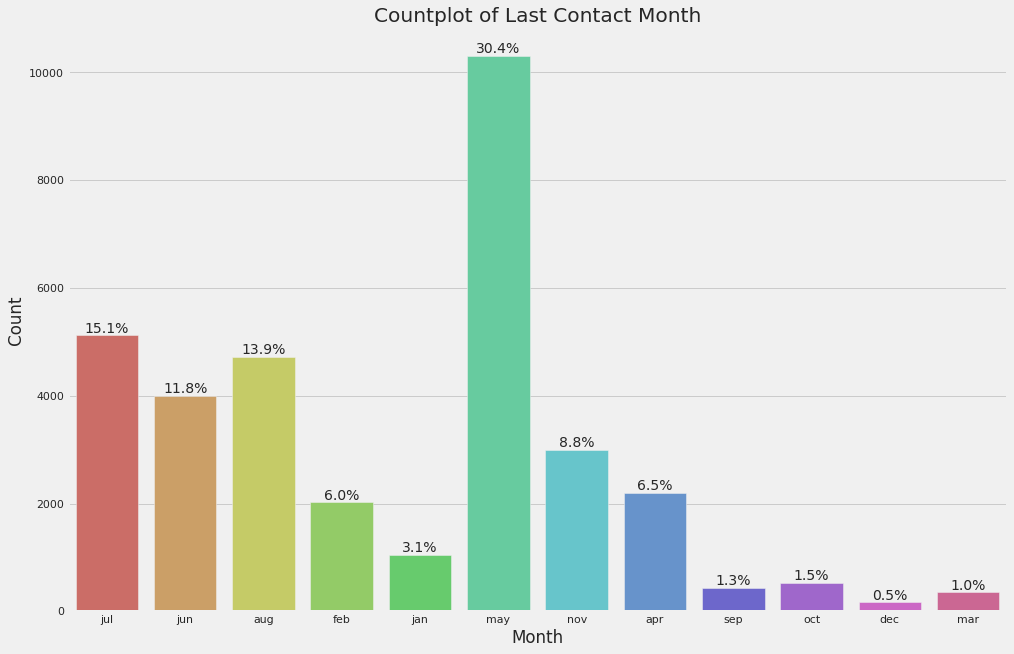

In [ ]:
# Plotting count of Month

fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x = "month", data = data, palette = "hls")
ax.set_title('Countplot of Last Contact Month')
ax.set_xlabel('Month')
ax.set_ylabel('Count')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+50)
    ax.annotate(percentage, (x, y),ha='center')

###3.2.12 Duration

In [ ]:
# Number of null values and unique values in Duration

print("Null Value in Duration :", data['duration'].isnull().sum())
print("Number of Unique Values in Duration :", data['duration'].nunique())

Null Value in Duration : 0
Number of Unique Values in Duration : 1469


In [ ]:
data["duration"].describe()

count    33908.000000
mean       257.899227
std        258.607105
min          0.000000
25%        103.000000
50%        179.000000
75%        318.000000
max       4918.000000
Name: duration, dtype: float64

(0.0, 2000.0)

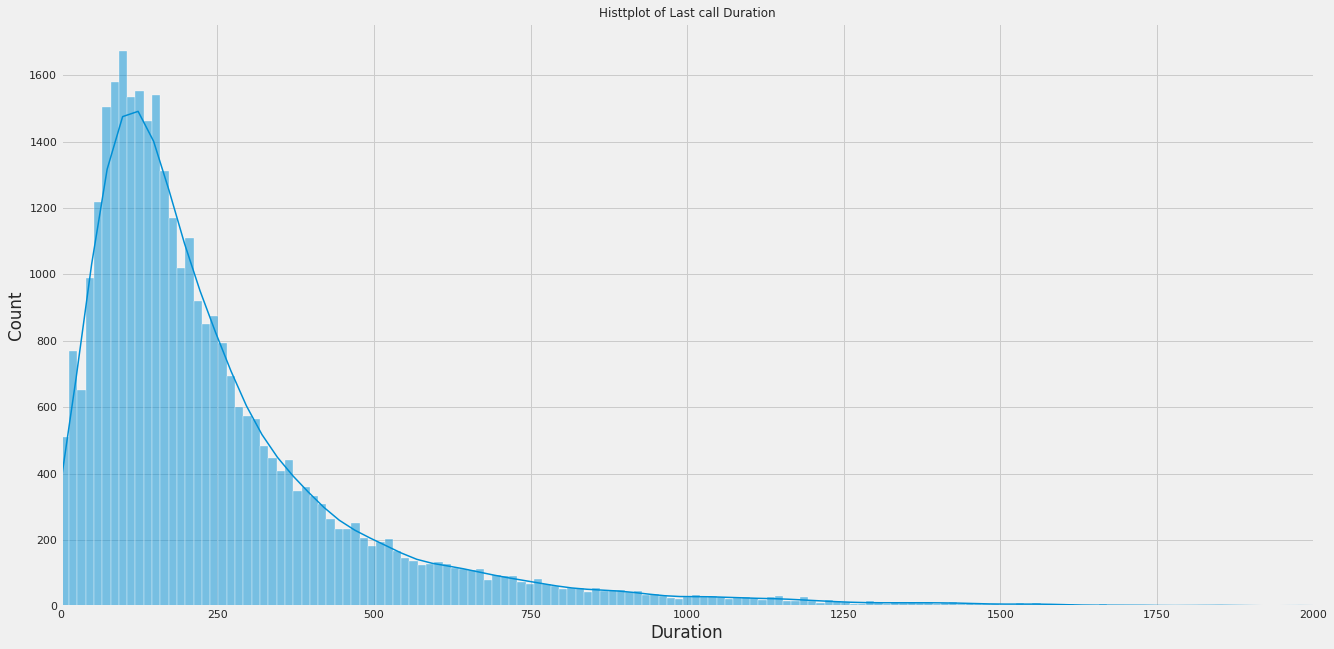

In [ ]:
# Creating Histplot of Duration

fig, ax = plt.subplots(figsize = (20,10))
sns.set(style="darkgrid")
sns.histplot(x="duration", data = data, kde=True)
ax.set_title('Histtplot of Last call Duration')
ax.set_xlabel('Duration')
ax.set_ylabel('Count')
ax.set_xlim(0, 2000)

Text(0, 0.5, 'Duration')

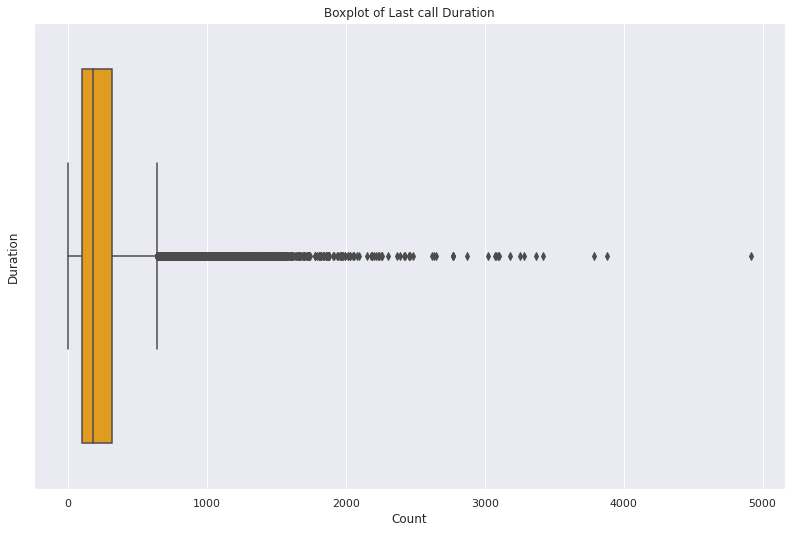

In [ ]:
# Creating Box plot of Duration
fig, ax = plt.subplots(figsize = (12,8))
sns.set(style="darkgrid")
sns.boxplot(x="duration", data = data, color='orange')
ax.set_title('Boxplot of Last call Duration')
ax.set_xlabel('Count')
ax.set_ylabel('Duration')

In [ ]:
# IQR, LW and UW of Boxplot of Duration

outlier(data, "duration")

IQR of duration :  215.0
LW of duration :  -219.5
UW of duration :  640.5


<Axes: xlabel='y', ylabel='duration'>

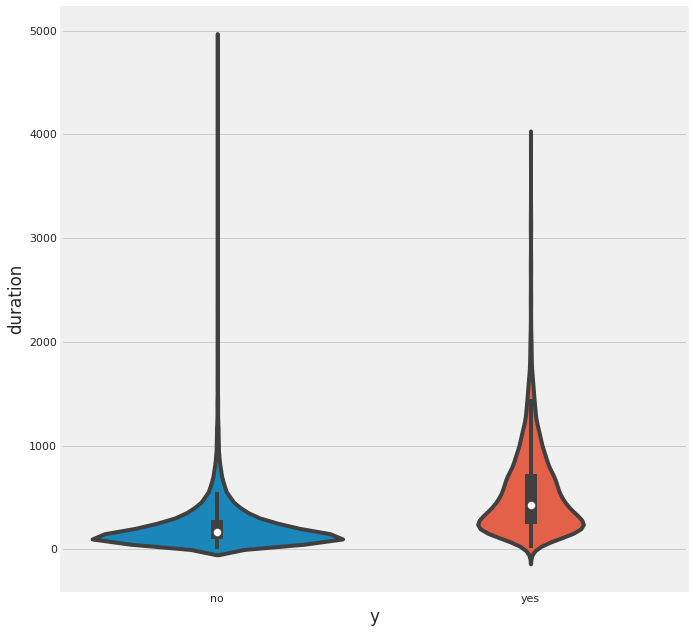

In [ ]:
# Creating Violin plot of Duration

plt.figure(figsize = (10, 10))
plt.style.use('fivethirtyeight')
sns.violinplot(x='y', y="duration", data=data)

### 3.2.13 Campaign

In [ ]:
# Number of null values and unique values in Campaign

print("Null Value in Campaign :", data['campaign'].isnull().sum())
print("Number of Unique Values in Campaign :", data['campaign'].nunique())

Null Value in Campaign : 0
Number of Unique Values in Campaign : 44


In [ ]:
data["campaign"].describe()

count    33908.000000
mean         2.752920
std          3.068299
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

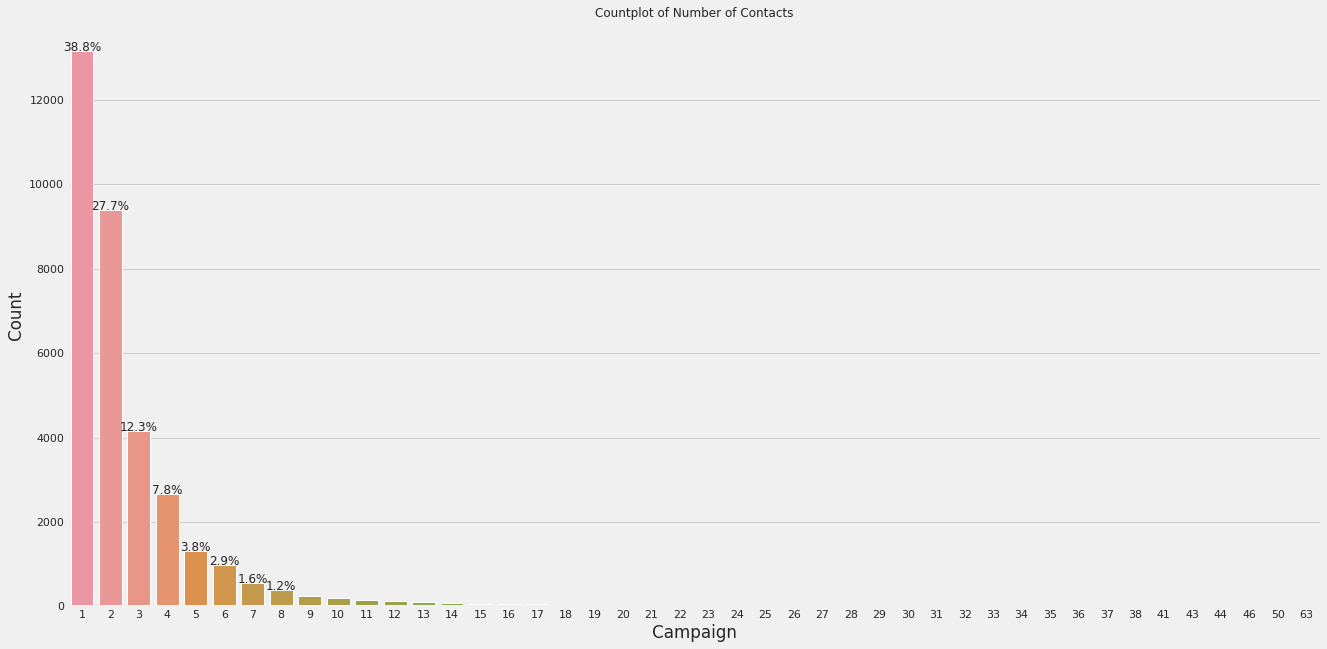

In [ ]:
# Creating Countplot of Campaign

fig, ax = plt.subplots(figsize = (20,10))
sns.set(style="darkgrid")
sns.countplot(x="campaign", data = data)
ax.set_title('Countplot of Number of Contacts')
ax.set_xlabel('Campaign')
ax.set_ylabel('Count')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    if (p.get_height()/len(data)) > 0.01:
        x = p.get_x() + (p.get_width()/2)
        y = (p.get_height()+2)
        ax.annotate(percentage, (x, y),ha='center')

Text(0, 0.5, 'Campaign')

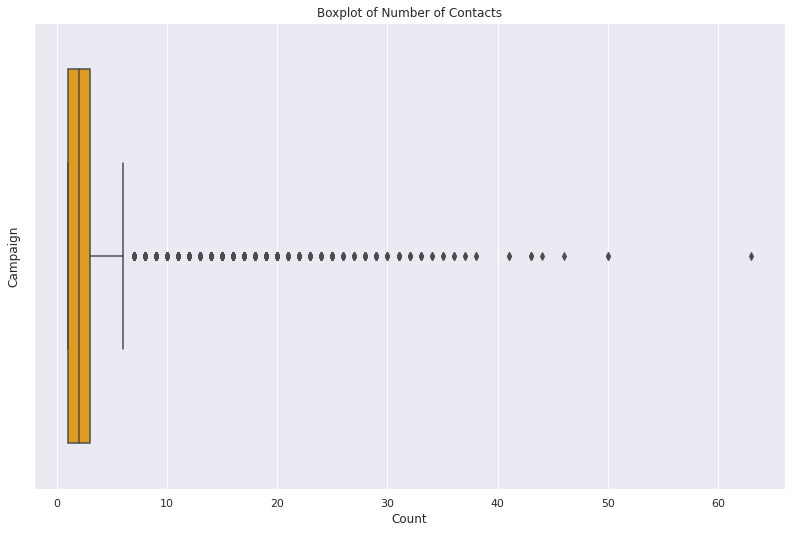

In [ ]:
# Creating Box plot of Campaign
fig, ax = plt.subplots(figsize = (12,8))
sns.set(style="darkgrid")
sns.boxplot(x="campaign", data = data, color='orange')
ax.set_title('Boxplot of Number of Contacts')
ax.set_xlabel('Count')
ax.set_ylabel('Campaign')

In [ ]:
# IQR, LW and UW of Boxplot of Campaign

outlier(data, "campaign")

IQR of campaign :  2.0
LW of campaign :  -2.0
UW of campaign :  6.0


<Axes: xlabel='y', ylabel='campaign'>

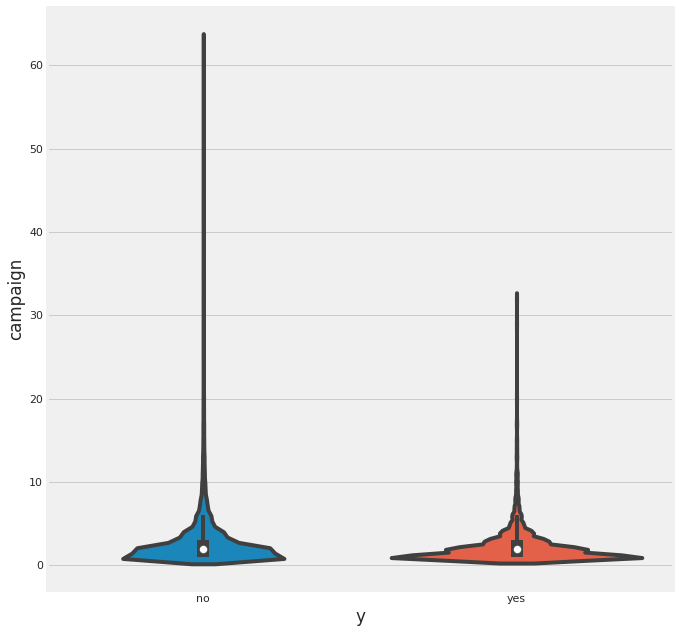

In [ ]:
# Creating Violin plot of Campaign

plt.figure(figsize = (10, 10))
plt.style.use('fivethirtyeight')
sns.violinplot(x='y', y="campaign", data=data)

###3.2.14 pdays

In [ ]:
# Number of null values and unique values in pdays

print("Null Value in pdays :", data['pdays'].isnull().sum())
print("Number of Unique Values in pdays :", data['pdays'].nunique())

Null Value in pdays : 0
Number of Unique Values in pdays : 512


In [ ]:
data["pdays"].describe()

count    33908.000000
mean        40.168515
std         99.892114
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Text(0, 0.5, 'Count')

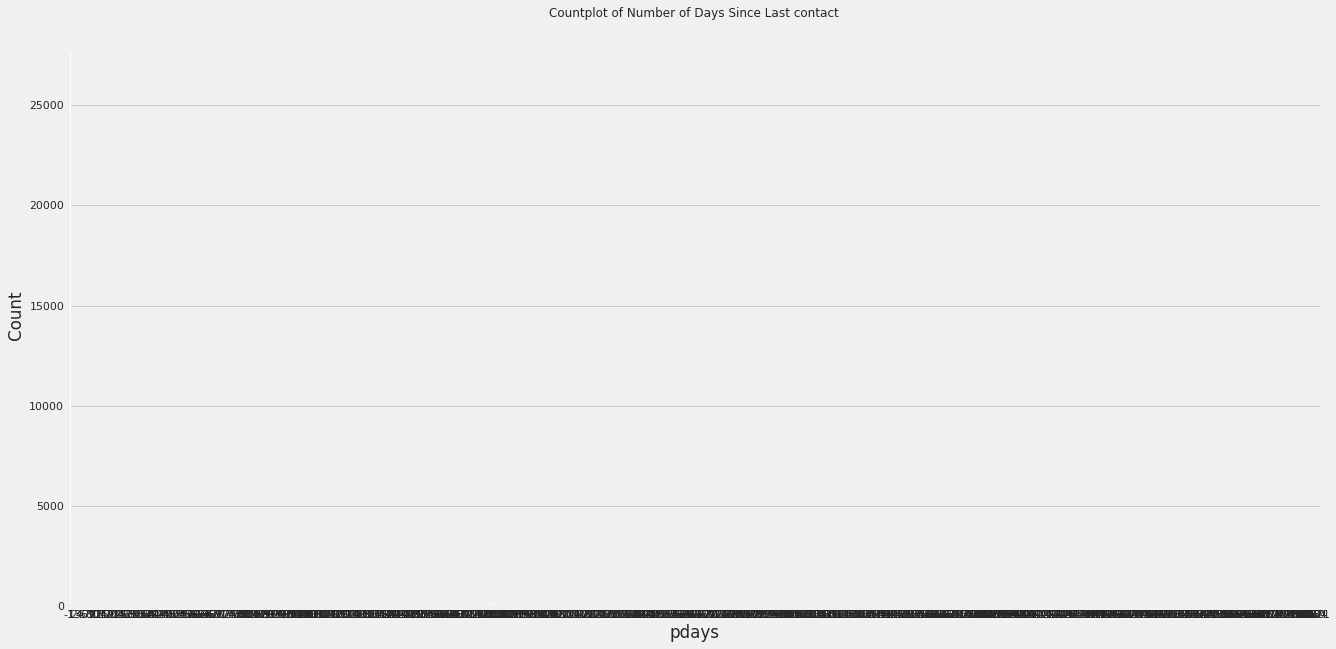

In [ ]:
# Creating Countplot of pdays

fig, ax = plt.subplots(figsize = (20,10))
sns.set(style="darkgrid")
sns.countplot(x="pdays", data = data)
ax.set_title('Countplot of Number of Days Since Last contact')
ax.set_xlabel('pdays')
ax.set_ylabel('Count')

Text(0, 0.5, 'pdays')

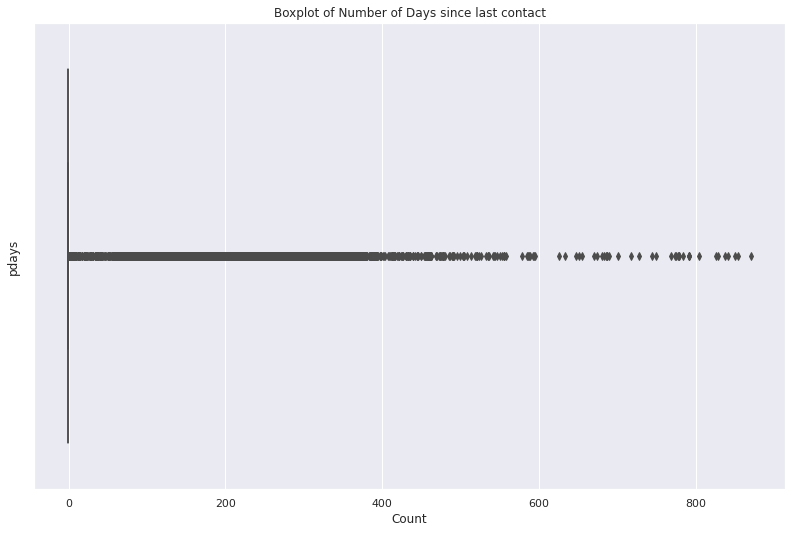

In [ ]:
# Creating Box plot of pdays
fig, ax = plt.subplots(figsize = (12,8))
sns.set(style="darkgrid")
sns.boxplot(x="pdays", data = data, color='orange')
ax.set_title('Boxplot of Number of Days since last contact')
ax.set_xlabel('Count')
ax.set_ylabel('pdays')

In [ ]:
# IQR, LW and UW of Boxplot of pdays

outlier(data, "pdays")

IQR of pdays :  0.0
LW of pdays :  -1.0
UW of pdays :  -1.0


<Axes: xlabel='y', ylabel='pdays'>

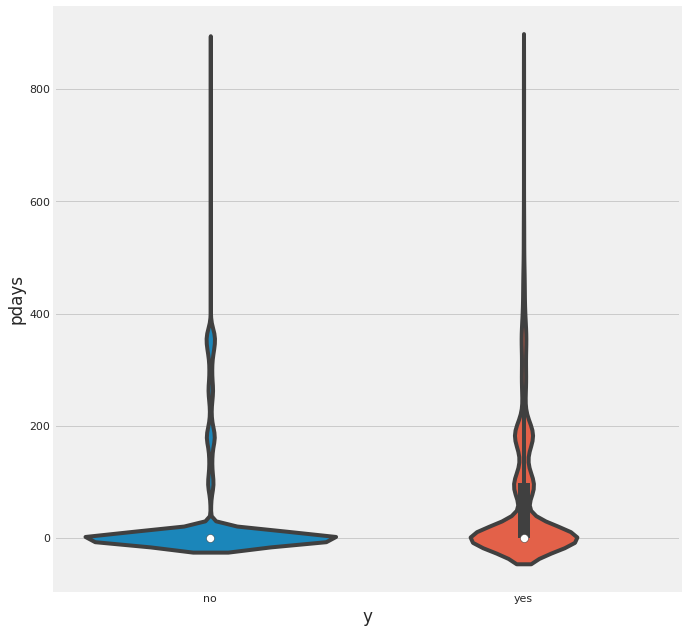

In [ ]:
# Creating Violin plot of pdays

plt.figure(figsize = (10, 10))
plt.style.use('fivethirtyeight')
sns.violinplot(x='y', y="pdays", data=data)

From these graphs we can see that maximum value occuring in pdays column is "-1". This shows that maximum number of people have never ben contacted before.

###3.2.15 Previous

In [ ]:
# Number of null values and unique values in Previous

print("Null Value in Previous :", data['previous'].isnull().sum())
print("Number of Unique Values in Previous :", data['previous'].nunique())

Null Value in Previous : 0
Number of Unique Values in Previous : 40


In [ ]:
data["previous"].describe()

count    33908.000000
mean         0.581987
std          2.412482
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

Text(0, 0.5, 'Count')

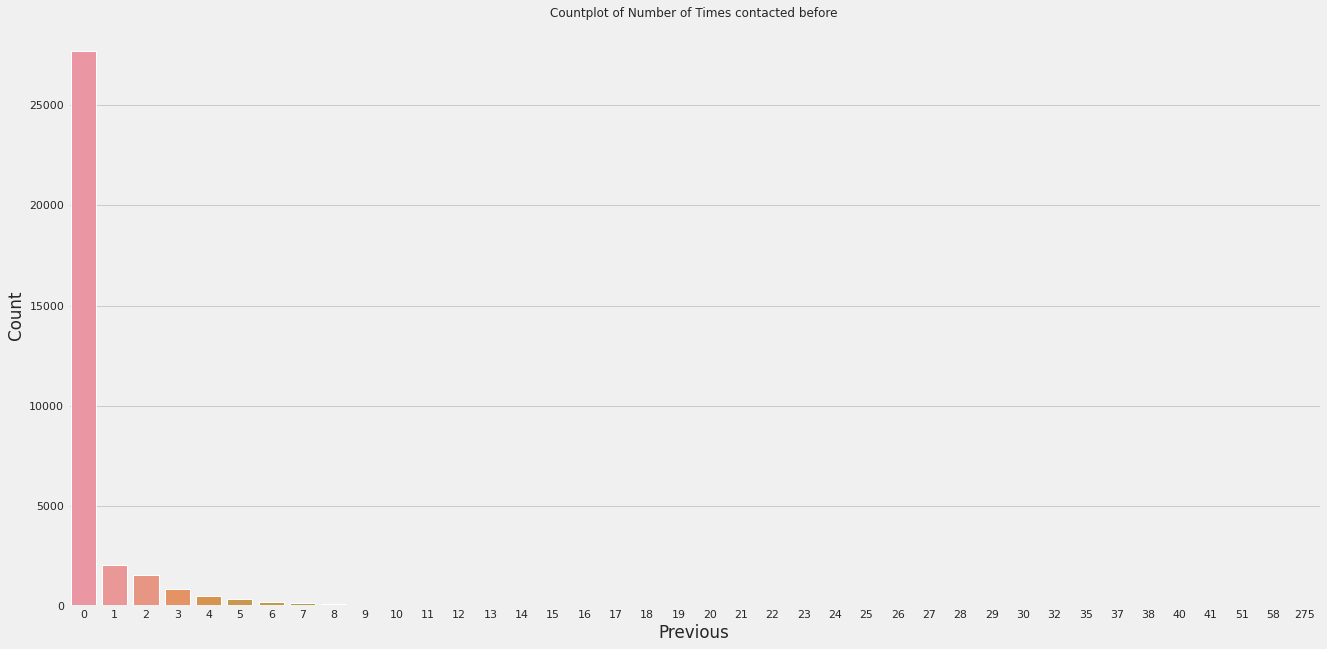

In [ ]:
# Creating Countplot of Previous

fig, ax = plt.subplots(figsize = (20,10))
sns.set(style="darkgrid")
sns.countplot(x="previous", data = data)
ax.set_title('Countplot of Number of Times contacted before')
ax.set_xlabel('Previous')
ax.set_ylabel('Count')

Text(0, 0.5, 'Previous')

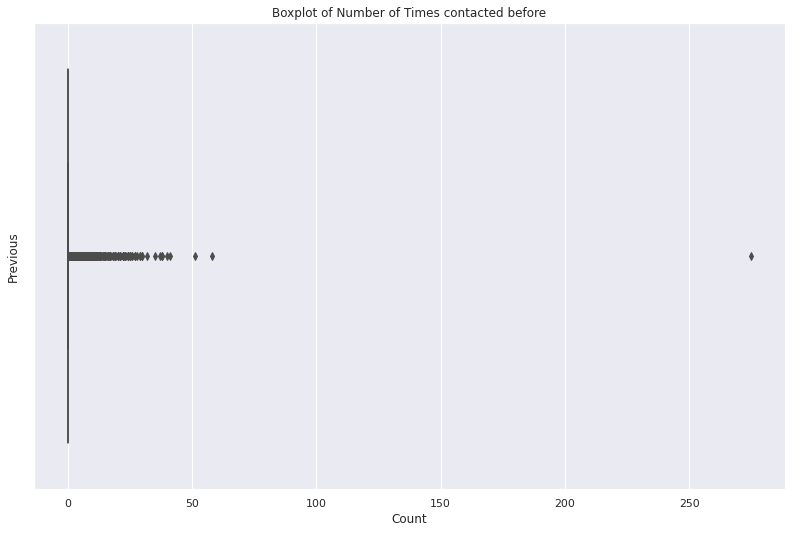

In [ ]:
# Creating Box plot of Previous
fig, ax = plt.subplots(figsize = (12,8))
sns.set(style="darkgrid")
sns.boxplot(x="previous", data = data, color='orange')
ax.set_title('Boxplot of Number of Times contacted before')
ax.set_xlabel('Count')
ax.set_ylabel('Previous')

In [ ]:
# IQR, LW and UW of Boxplot of Previous

outlier(data, "pdays")

IQR of pdays :  0.0
LW of pdays :  -1.0
UW of pdays :  -1.0


<Axes: xlabel='y', ylabel='previous'>

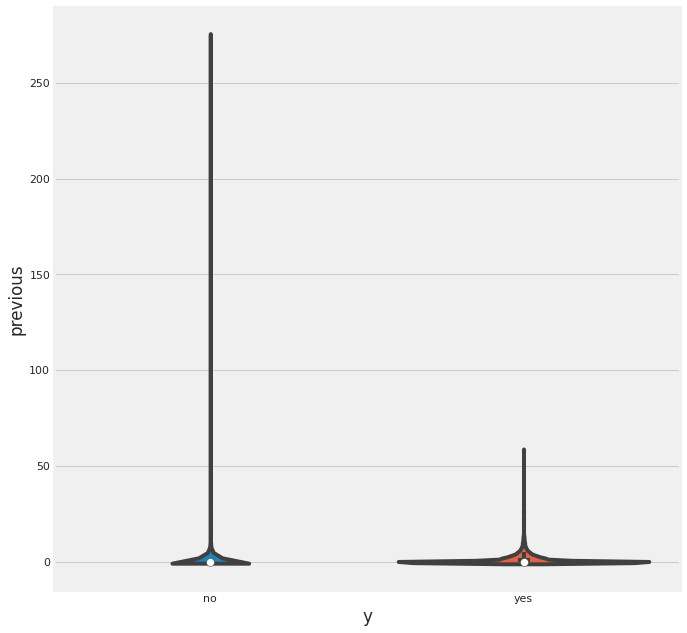

In [ ]:
# Creating Violin plot of Previous

plt.figure(figsize = (10, 10))
plt.style.use('fivethirtyeight')
sns.violinplot(x='y', y="previous", data=data)

From these graphs we can see that maximum people have never been contacted before, i.e. 0 occurs maximum times in this column.<br>
This is also clear by the previous colunm pdays, which shows that "-1" occurs the maximum number of times.

###3.2.16 Poutcome

In [ ]:
# Number of null values and unique values in Poutcome

print("Null Value in Poutcome :", data['poutcome'].isnull().sum())
print("Number of Unique Values in Poutcome :", data['poutcome'].nunique())

Null Value in Poutcome : 0
Number of Unique Values in Poutcome : 4


In [ ]:
data['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [ ]:
# Value Counts and percentage of Poutcome

print("Poutcome:\n")
count = data["poutcome"].value_counts()
percent = round((data['poutcome'].value_counts() / len(data))*100, 2)
values = {'Count' : count, 'Percentage' : percent}
pd.DataFrame(values)

Poutcome:



,Count,Percentage
unknown,27710,81.72
failure,3686,10.87
other,1373,4.05
success,1139,3.36


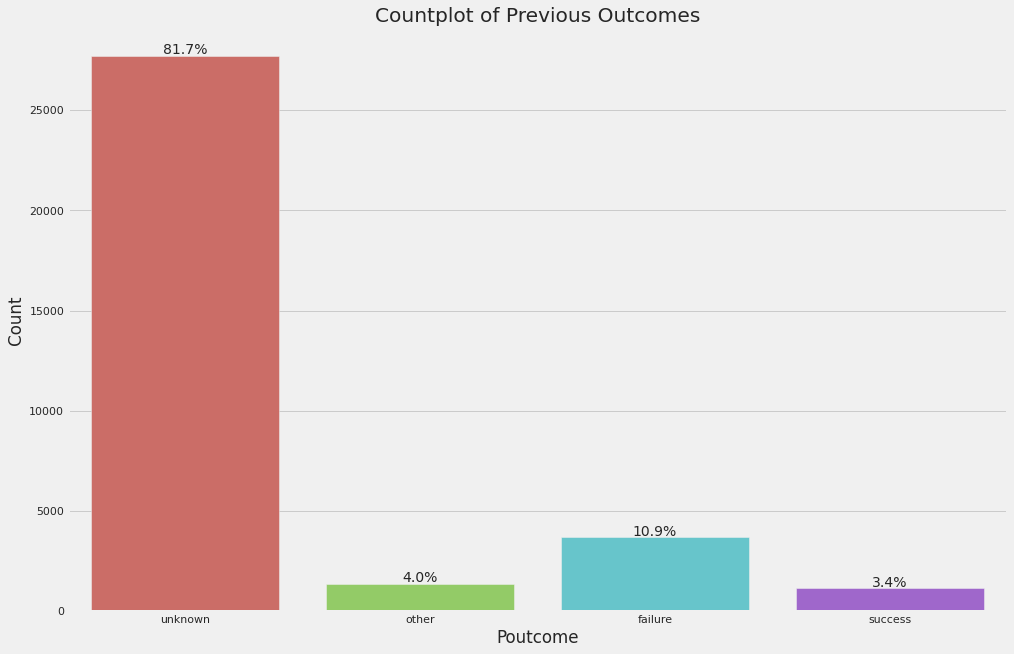

In [ ]:
# Plotting count of Poutcome

fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x = "poutcome", data = data, palette = "hls")
ax.set_title('Countplot of Previous Outcomes')
ax.set_xlabel('Poutcome')
ax.set_ylabel('Count')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+100)
    ax.annotate(percentage, (x, y),ha='center')

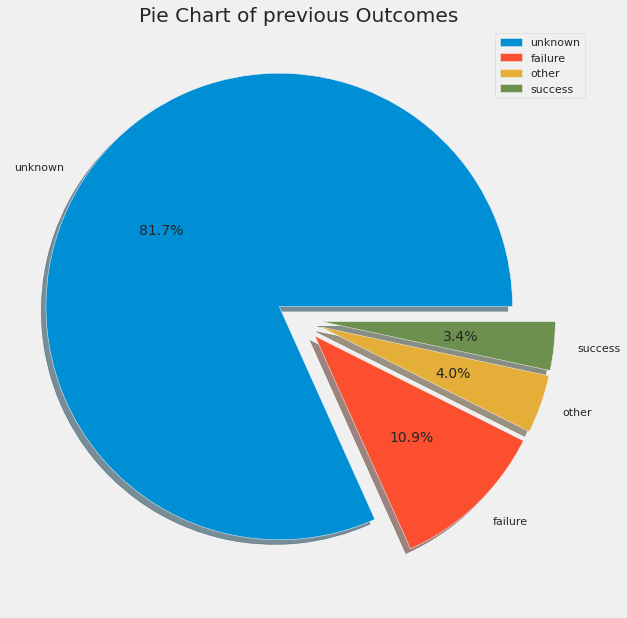

In [ ]:
# Pie chart of Poutcome

pie_data = data["poutcome"].value_counts()
plt.subplots(figsize = (15,10))
plt.pie(pie_data, labels = pie_data.index, explode = [0.1, 0.1, 0.1, 0.1], shadow = True, autopct='%1.1f%%')
plt.title('Pie Chart of previous Outcomes')
plt.legend()

### 3.2.17 y: Target Variable

In [ ]:
# Number of null values and unique values in Target Variable

print("Null Value in Target Variable :", data['y'].isnull().sum())
print("Number of Unique Values in Target Variable :", data['y'].nunique())

Null Value in Target Variable : 0
Number of Unique Values in Target Variable : 2


In [ ]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
# Value Counts and percentage of Target variable

print("Target Variable:\n")
count = data["y"].value_counts()
percent = round((data['y'].value_counts() / len(data))*100, 2)
values = {'Count' : count, 'Percentage' : percent}
pd.DataFrame(values)

Target Variable:



,Count,Percentage
no,29941,88.3
yes,3967,11.7


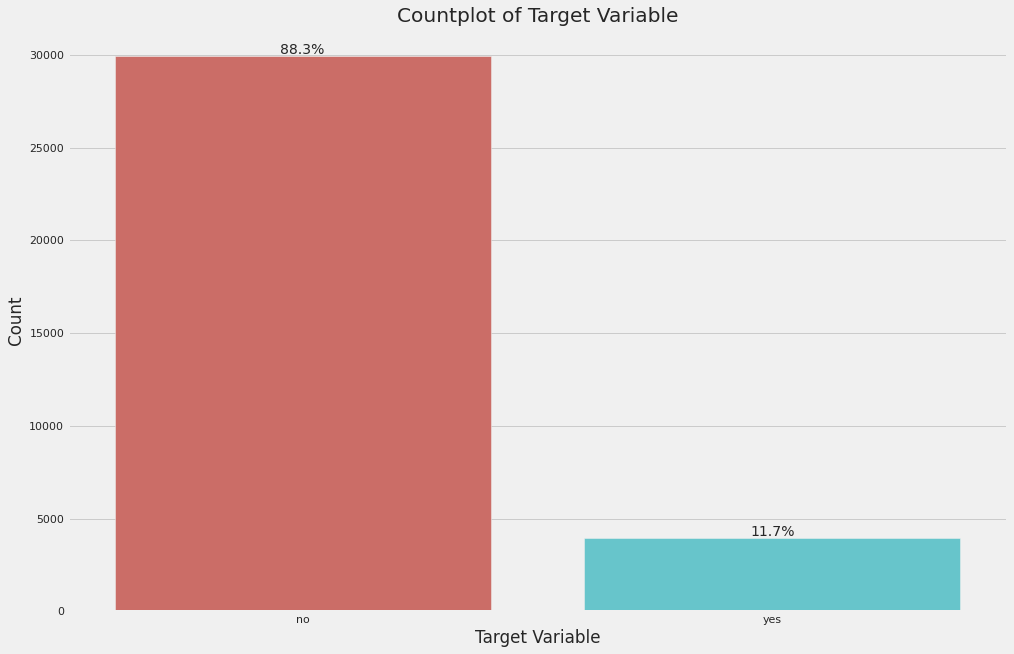

In [ ]:
# Plotting count of Target Variable

fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x = "y", data = data, palette = "hls")
ax.set_title('Countplot of Target Variable')
ax.set_xlabel('Target Variable')
ax.set_ylabel('Count')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + (p.get_width()/2)
    y = (p.get_height()+100)
    ax.annotate(percentage, (x, y),ha='center')

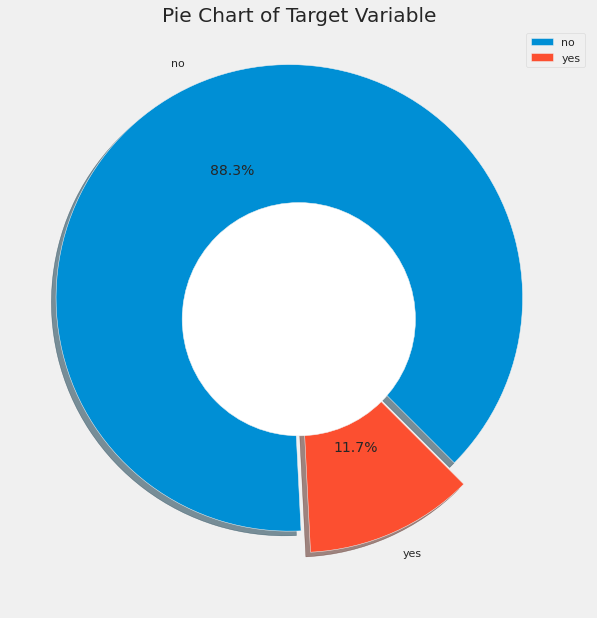

In [ ]:
# Pie chart of Target variable

pie_data = data["y"].value_counts()
plt.subplots(figsize = (15,10))
plt.pie(pie_data, labels = pie_data.index, shadow = True, startangle = 315, autopct='%1.1f%%', explode = [0.1, 0])
plt.title('Pie Chart of Target Variable')
plt.legend()
centre_circle = plt.Circle((0, 0), 0.50, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

## 3.3 Bivariate Analysis

### 3.3.1 Categorical - Categorical

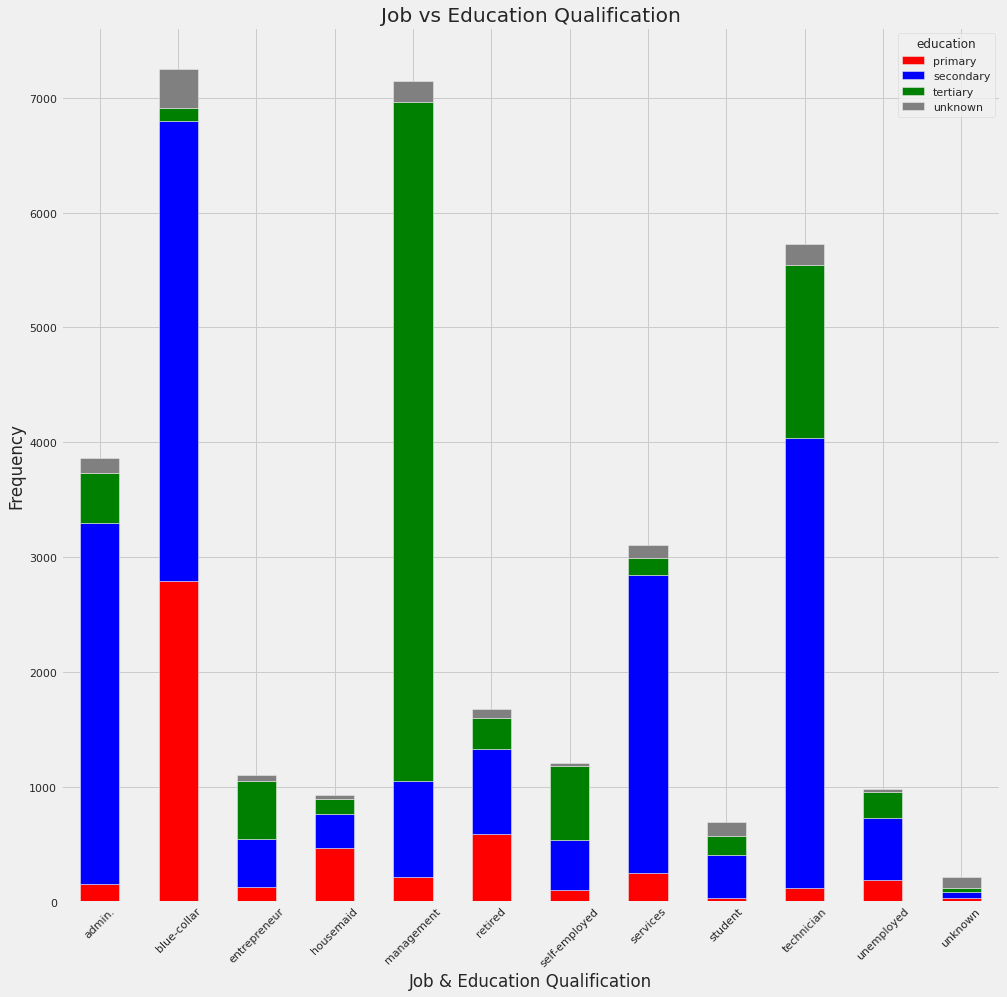

In [ ]:
# Job vs Education Qualification

pd.crosstab(data["job"], data["education"]).plot(kind="bar", stacked=True, figsize=(15,15), color=['red', 'blue', 'green', 'gray'])
plt.title('Job vs Education Qualification')
plt.xlabel('Job & Education Qualification')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

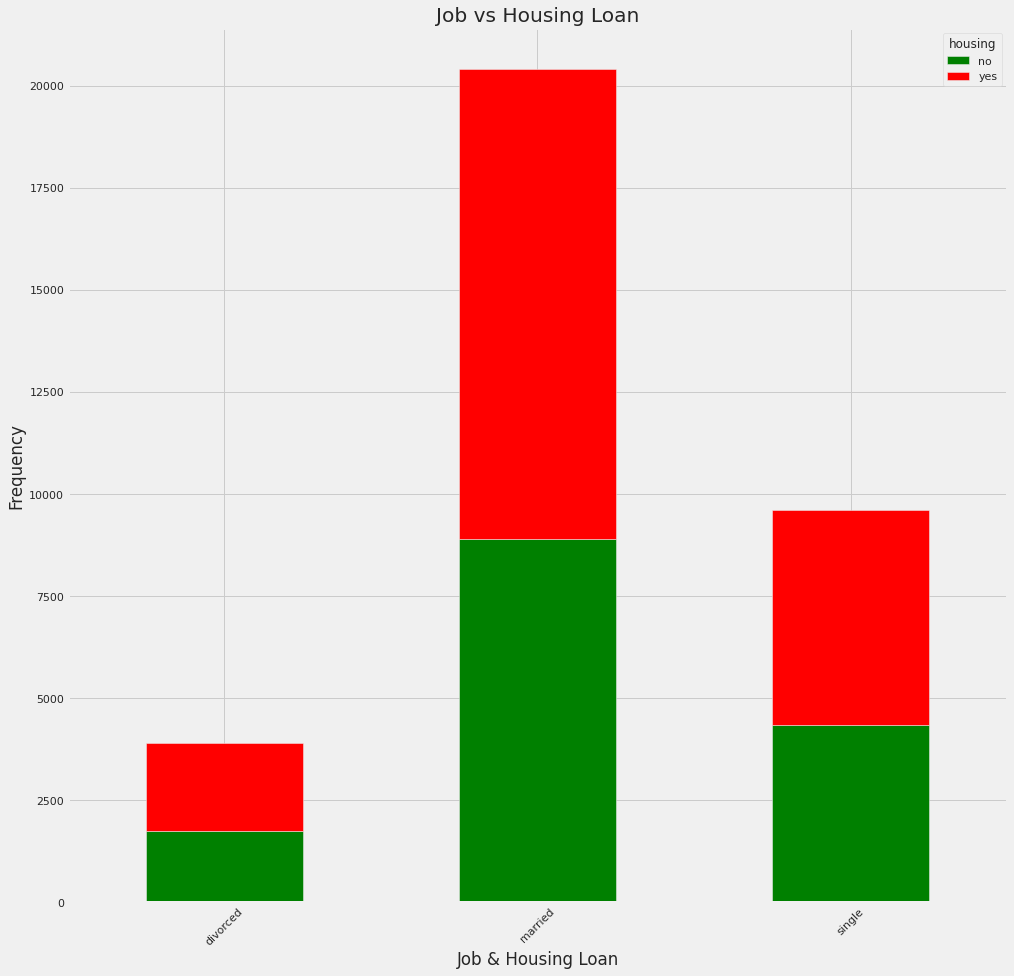

In [ ]:
# Job vs Housing Loan

pd.crosstab(data["marital"], data["housing"]).plot(kind="bar", stacked=True, figsize=(15,15), color=['green', 'red'])
plt.title('Job vs Housing Loan')
plt.xlabel('Job & Housing Loan')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

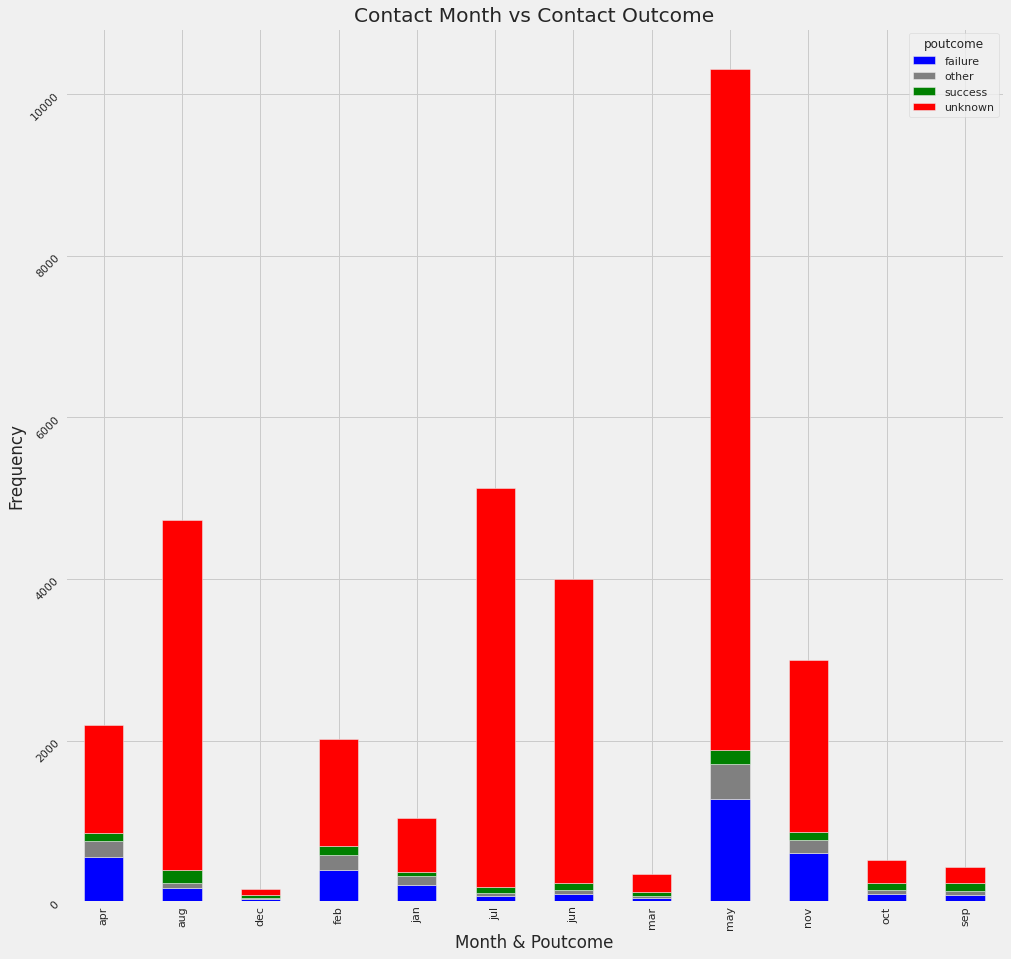

In [ ]:
# Contact Month vs Contact Outcome

pd.crosstab(data["month"], data["poutcome"]).plot(kind = "bar", stacked = True, figsize = (15,15), color = ['blue', 'gray', 'green', 'red'])
plt.title('Contact Month vs Contact Outcome')
plt.xlabel('Month & Poutcome')
plt.ylabel('Frequency')
plt.yticks(rotation=45)
plt.show()

###3.3.2 Numerical - Numerical

In [ ]:
fig = px.scatter(df, x="duration", y="campaign", color='poutcome')
fig.show()

In [ ]:
fig = px.scatter(df, x="balance", y="age", color='y')
fig.show()

Text(0.5, 0.98, 'Scatter Plots of Age, Balance, Duration and Campaign')

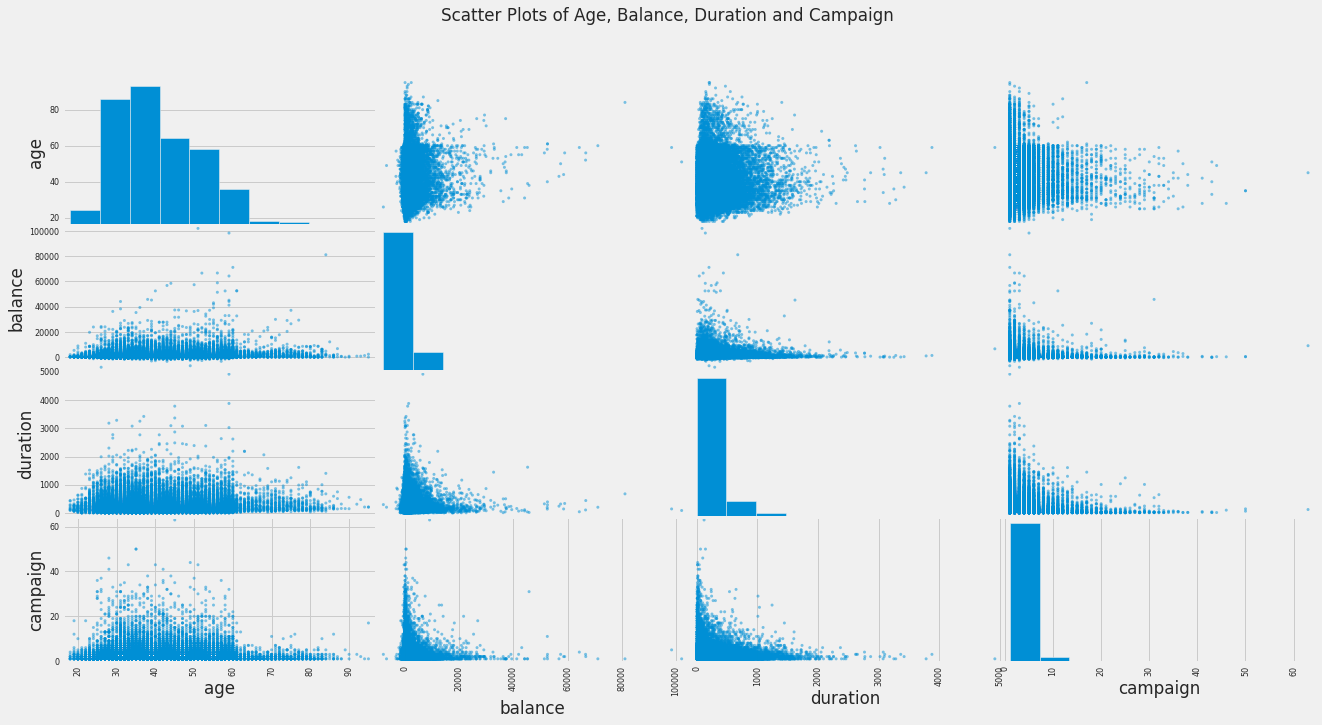

In [ ]:
scatter_matrix(data[['age','balance','duration','campaign']],figsize=(20,10))
plt.suptitle('Scatter Plots of Age, Balance, Duration and Campaign')

#4. Data Preprocessing

## 4.1 Remove Outliers

In [ ]:
data_num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
# function to find percetage of outliers in a column

def percentage_outlier(df, col):
    IQR=df[col].quantile(0.75)-df[col].quantile(0.25)
    LW=df[col].quantile(0.25)-(IQR*1.5)
    UW=df[col].quantile(0.75)+(IQR*1.5)
    n = 100 * (len(df[df[col] > UW]) + len(df[df[col] < LW])) / len(df[col])
    return n

In [ ]:
for i in data_num:
    print(i , percentage_outlier(data, i))

age 1.0705438244662027
balance 10.46360740828123
day 0.0
duration 7.22543352601156
campaign 6.691636192049074
pdays 18.28771971216232
previous 18.28771971216232


Since Percentage of outliers for every numerical column except age and day is above 5%, we can change the value by using Q1 and Q3.

In [ ]:
# Defining Outliers treatment with mean Function

def outliers_with_mean(df,col):
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        LW = df[col].quantile(0.25) - (IQR*1.5)
        UW = df[col].quantile(0.75) + (IQR*1.5)
        print("For feature {} Lower Whisker is {} and Upper Whisker is {} \n".format(col,LW,UW))
        df[col] = np.where(df[col] < LW, df[col].quantile(0.25), df[col])
        df[col] = np.where(df[col] > UW, df[col].quantile(0.75), df[col])

In [ ]:
for i in data_num:
    outliers_with_mean(data, i)

For feature age Lower Whisker is 10.5 and Upper Whisker is 70.5 

For feature balance Lower Whisker is -1960.0 and Upper Whisker is 3464.0 

For feature day Lower Whisker is -11.5 and Upper Whisker is 40.5 

For feature duration Lower Whisker is -219.5 and Upper Whisker is 640.5 

For feature campaign Lower Whisker is -2.0 and Upper Whisker is 6.0 

For feature pdays Lower Whisker is -1.0 and Upper Whisker is -1.0 

For feature previous Lower Whisker is 0.0 and Upper Whisker is 0.0 



In [ ]:
for i in data_num:
    print(i , percentage_outlier(data, i))

age 0.0
balance 0.0
day 0.0
duration 0.0
campaign 0.0
pdays 0.0
previous 0.0


##4.2 Encoding

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,5,1,1,0,166.0,0,1,2,3.0,5,211.0,1.0,-1.0,0.0,3,0
1,51.0,1,1,0,0,2995.0,1,0,2,11.0,6,93.0,2.0,-1.0,0.0,3,0
2,50.0,4,1,2,0,569.0,0,1,0,18.0,1,452.0,4.0,-1.0,0.0,3,0
3,27.0,0,1,1,0,73.0,1,0,0,5.0,3,140.0,1.0,-1.0,0.0,3,0
4,38.0,6,0,2,0,1430.0,0,0,0,12.0,4,296.0,1.0,-1.0,0.0,3,0


In [ ]:
# Encoding

data_encoded = pd.get_dummies(data, columns = data_cat, drop_first=True)

In [356]:
data_encoded

,age,balance,day,duration,campaign,pdays,previous,job_1,job_2,job_3,...,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_1,poutcome_2,poutcome_3,Target
0,58.0,166.0,3.0,211.0,1.0,-1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,51.0,2995.0,11.0,93.0,2.0,-1.0,0.0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,50.0,569.0,18.0,452.0,4.0,-1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,27.0,73.0,5.0,140.0,1.0,-1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,38.0,1430.0,12.0,296.0,1.0,-1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,32.0,471.0,2.0,243.0,3.0,-1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
33904,44.0,0.0,20.0,141.0,3.0,-1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33905,42.0,0.0,6.0,293.0,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
33906,34.0,116.0,11.0,145.0,2.0,-1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data_encoded = data_encoded.rename(columns={'y_1': 'Target'})

##4.3 Feature Separating

In [ ]:
X = data_encoded.drop(["Target"], axis = 1)
y = data_encoded["Target"]

##4.4 SMOTE

In [ ]:
X, y = SMOTE().fit_resample(X, y)

In [ ]:
y.value_counts()

0    29941
1    29941
Name: Target, dtype: int64

##4.5 Scaling 

In [ ]:
# Using Min Max Scaler for scaling the data

X_scaled = MinMaxScaler().fit_transform(X)

In [ ]:
X = pd.DataFrame(X_scaled, columns = X.columns)

##4.6 Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47905, 42), (11977, 42), (47905,), (11977,))

#5. Models

##5.1 Logistic Regression

In [ ]:
LRclassifier = LogisticRegression()
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

LRF1 = f1_score(y_test, y_pred)
print('LR F1 Score: ',LRF1)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      6065
           1       0.87      0.87      0.87      5912

    accuracy                           0.87     11977
   macro avg       0.87      0.87      0.87     11977
weighted avg       0.87      0.87      0.87     11977

[[5311  754]
 [ 773 5139]]
LR F1 Score:  0.8706480304955526


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# trying shap values to find important features

explainer = shap.Explainer(LRclassifier, X_train)
shap_values = explainer(X_train)

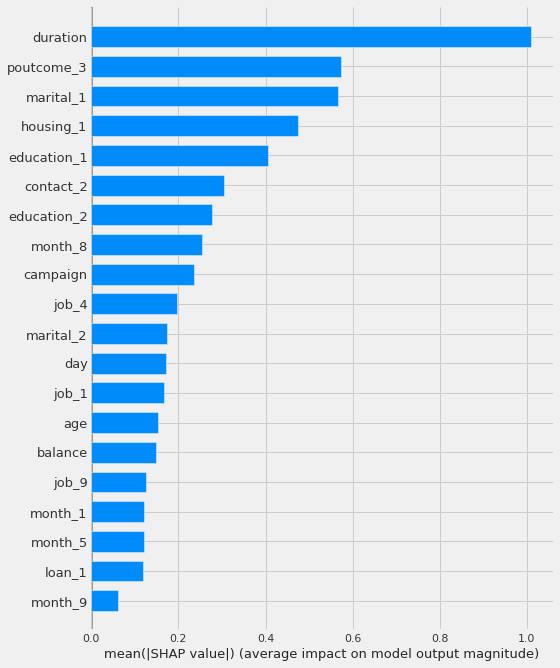

In [ ]:
shap.summary_plot(shap_values, X_train, feature_names = X_train.columns, plot_type="bar")

In [ ]:
# Using coef to find out important features

coef_abs = np.abs(LRclassifier.coef_)

mean_coef = np.mean(coef_abs, axis=0)

feature_importance = pd.DataFrame(list(zip(X_train.columns, mean_coef)),
                                  columns=['Feature', 'Coefficient Value'])

feature_importance = feature_importance.sort_values(by='Coefficient Value', ascending=False)

print(feature_importance)

        Feature  Coefficient Value
41   poutcome_3           1.281931
18    marital_1           1.134306
27    contact_2           1.029098
24    housing_1           1.007590
35      month_8           0.857376
20  education_1           0.844831
7         job_1           0.811584
32      month_5           0.752228
28      month_1           0.748494
21  education_2           0.746324
10        job_4           0.677168
25       loan_1           0.675500
15        job_9           0.647534
36      month_9           0.566623
19    marital_2           0.531719
33      month_6           0.469059
13        job_7           0.401302
30      month_3           0.294562
31      month_4           0.286007
26    contact_1           0.285425
39   poutcome_1           0.270860
22  education_3           0.259660
4      campaign           0.255630
12        job_6           0.221909
40   poutcome_2           0.218003
8         job_2           0.212611
11        job_5           0.202309
9         job_3     

##5.2 KNN

In [ ]:
KNclassifier = KNeighborsClassifier()
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

KNF1 = f1_score(y_test, y_pred)
print('KN F1 Score: ',KNF1)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      6065
           1       0.78      0.96      0.86      5912

    accuracy                           0.85     11977
   macro avg       0.86      0.85      0.84     11977
weighted avg       0.86      0.85      0.84     11977

[[4471 1594]
 [ 261 5651]]
KN F1 Score:  0.8590104127080641


##5.3 Decision Tree

In [283]:
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

DTF1 = f1_score(y_test, y_pred)
print('DT F1 Score: ',DTF1)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      6065
           1       0.91      0.92      0.92      5912

    accuracy                           0.92     11977
   macro avg       0.92      0.92      0.92     11977
weighted avg       0.92      0.92      0.92     11977

[[5525  540]
 [ 448 5464]]
DT F1 Score:  0.9170862705605908


##5.4 Random Forest

In [286]:
RFclassifier = RandomForestClassifier()
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

RFF1 = f1_score(y_test, y_pred)
print('RF F1 Score: ',RFF1)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6065
           1       0.95      0.93      0.94      5912

    accuracy                           0.94     11977
   macro avg       0.94      0.94      0.94     11977
weighted avg       0.94      0.94      0.94     11977

[[5770  295]
 [ 421 5491]]
RF F1 Score:  0.938792956060865


##5.5 XG Boost

In [ ]:
XGclassifier = XGBClassifier()
XGclassifier.fit(X_train, y_train)

y_pred = XGclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

XGF1 = f1_score(y_test, y_pred)
print('XG F1 Score: ',XGF1)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6065
           1       0.94      0.94      0.94      5912

    accuracy                           0.94     11977
   macro avg       0.94      0.94      0.94     11977
weighted avg       0.94      0.94      0.94     11977

[[5737  328]
 [ 376 5536]]
XG F1 Score:  0.9402173913043478


##5.6 Gradient Boosting Machine

In [ ]:
GBMclassifier = GradientBoostingClassifier()
GBMclassifier.fit(X_train, y_train)

y_pred = GBMclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

GBMF1 = f1_score(y_test, y_pred)
print('GBM F1 Score: ',GBMF1)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6065
           1       0.93      0.93      0.93      5912

    accuracy                           0.93     11977
   macro avg       0.93      0.93      0.93     11977
weighted avg       0.93      0.93      0.93     11977

[[5633  432]
 [ 395 5517]]
GBM F1 Score:  0.9302756934491189


##5.7 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

y_pred = NBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

NBF1 = f1_score(y_test, y_pred)
print('CAT F1 Score: ',NBF1)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      6065
           1       0.85      0.87      0.86      5912

    accuracy                           0.86     11977
   macro avg       0.86      0.86      0.86     11977
weighted avg       0.86      0.86      0.86     11977

[[5180  885]
 [ 793 5119]]
CAT F1 Score:  0.8591809331990602


## 5.8Model Comparison

In [301]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'Decision Tree', 'Random Forest', 'XG Boost', 
                                  'Gradient Boosting Machine', 'Naive Bayes'], 
                        'F1_Score': [LRF1, KNF1, DTF1, RFF1, XGF1, GBMF1, NBF1]})
compare.sort_values(by='F1_Score', ascending=False)

,Model,F1_Score
4,XG Boost,0.940217
3,Random Forest,0.938793
5,Gradient Boosting Machine,0.930276
2,Decision Tree,0.917086
0,Logistic Regression,0.870648
6,Naive Bayes,0.859181
1,K Neighbors,0.859010


#6. Hyperparameter Tuning

##6.1 Logistic Regression

In [267]:
%%time
param_grid = {
              "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
              "penalty" : ['l2'],
              "C" : [100, 10, 1.0, 0.1, 0.01]
             }

lr = LogisticRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, verbose=True)
grid_search.fit(X_train, y_train)

lr_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9113871203423443
CPU times: user 3min 19s, sys: 1min 10s, total: 4min 30s
Wall time: 3min 59s


##6.2 KNN

In [265]:
%%time
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)

knc = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knc, param_grid=param_grid, verbose=True, n_jobs = -1)
grid_search.fit(X_train, y_train)

knc_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
{'n_neighbors': 1}
0.876338586786348
CPU times: user 3.83 s, sys: 559 ms, total: 4.38 s
Wall time: 8min 16s


##6.3 Decision Tree

In [278]:
%%time
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': range(1,5),
              'min_samples_split': range(2,5),
              'min_samples_leaf': range(1,5),
              'criterion' :['gini', 'entropy']
             }

tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, n_jobs = -1, verbose=True)
grid_search.fit(X_train, y_train)

dt_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 4}
0.8055317816511847
CPU times: user 4.72 s, sys: 597 ms, total: 5.32 s
Wall time: 1min 2s


##6.4 Random Forest

In [279]:
%%time
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
param_grid = {
              'n_estimators': n_estimators,
              'criterion': ['gini'],
              'max_depth' : [14],
              'max_features': ['log2'],
              'min_samples_leaf': [8],
              'min_samples_split': [2]
             }

rfc_clas = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc_clas, param_grid=param_grid, verbose=True,n_jobs=-1)
grid_search.fit(X_train, y_train)

rf_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 190}
0.9289218244442126
CPU times: user 11.8 s, sys: 313 ms, total: 12.1 s
Wall time: 5min 46s


##6.5 XG Boost

In [316]:
%%time
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
params = {
    'n_estimators': n_estimators,
    'learning_rate': [0.1,0.3],
    'max_depth' : [5, 7],
    'subsample': [0.6, 0.8]
}

xgb_clf = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=params, verbose=True,n_jobs=-1)
grid_search.fit(X_train, y_train)

xgb_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.6}
0.9432835820895523
CPU times: user 54 s, sys: 1.69 s, total: 55.7 s
Wall time: 39min 39s


##6.6 GBM

In [300]:
%%time
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
params = {
    'n_estimators': n_estimators,
    'learning_rate': [0.1,0.3,0.5],
    'max_depth' : [14],
    'max_features': ['log2'],
    'min_samples_leaf': [8],
    'min_samples_split': [2]
}

gbc_clas = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gbc_clas, param_grid=params, verbose=True,n_jobs=-1)
grid_search.fit(X_train, y_train)

gbc_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'learning_rate': 0.3, 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 200}
0.9445986848971923
CPU times: user 31.7 s, sys: 662 ms, total: 32.4 s
Wall time: 12min 29s


##6.7 Naive Bayes

In [274]:
%%time
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gnb = GaussianNB()
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, verbose=True,n_jobs=-1)
grid_search.fit(X_train, y_train)

gnb_best = grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 2.310129700083158e-08}
0.8781546811397558
CPU times: user 2.87 s, sys: 450 ms, total: 3.32 s
Wall time: 37.7 s


#7. Optimized Models

##7.1 Logistic Regression

In [268]:
lr_best

LogisticRegression(C=100, solver='newton-cg')

In [269]:
y_pred = lr_best.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

O_LRF1 = f1_score(y_test, y_pred)
print('Optimized LR F1 Score: ',O_LRF1)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      6065
           1       0.92      0.90      0.91      5912

    accuracy                           0.91     11977
   macro avg       0.91      0.91      0.91     11977
weighted avg       0.91      0.91      0.91     11977

[[5624  441]
 [ 591 5321]]
Optimized LR F1 Score:  0.911598423847867


##7.2 KNN

In [270]:
knc_best

KNeighborsClassifier(n_neighbors=1)

In [271]:
y_pred = knc_best.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

O_KNF1 = f1_score(y_test, y_pred)
print('Optimized KN F1 Score: ',O_KNF1)

              precision    recall  f1-score   support

           0       0.95      0.81      0.88      6065
           1       0.83      0.96      0.89      5912

    accuracy                           0.88     11977
   macro avg       0.89      0.88      0.88     11977
weighted avg       0.89      0.88      0.88     11977

[[4920 1145]
 [ 256 5656]]
Optimized KN F1 Score:  0.8897978447258711


##7.3 Decision Tree

In [290]:
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       min_samples_leaf=3, min_samples_split=4)

In [291]:
y_pred = dt_best.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

O_DTF1 = f1_score(y_test, y_pred)
print('Optimized DT F1 Score: ',O_DTF1)

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      6065
           1       0.79      0.75      0.77      5912

    accuracy                           0.78     11977
   macro avg       0.78      0.78      0.78     11977
weighted avg       0.78      0.78      0.78     11977

[[4866 1199]
 [1476 4436]]
Optimized DT F1 Score:  0.768338096475275


##7.4 Random Forest

In [292]:
rf_best

RandomForestClassifier(max_depth=14, max_features='log2', min_samples_leaf=8,
                       n_estimators=190)

In [293]:
y_pred = rf_best.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

O_RFF1 = f1_score(y_test, y_pred)
print('Optimized RF F1 Score: ',O_RFF1)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6065
           1       0.93      0.92      0.93      5912

    accuracy                           0.93     11977
   macro avg       0.93      0.93      0.93     11977
weighted avg       0.93      0.93      0.93     11977

[[5682  383]
 [ 473 5439]]
Optimized RF F1 Score:  0.9270495994545764


##7.5 XG Boost

In [317]:
xgb_best

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [318]:
y_pred = xgb_best.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

O_XGBF1 = f1_score(y_test, y_pred)
print('Optimized XGB F1 Score: ',O_XGBF1)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6065
           1       0.95      0.94      0.94      5912

    accuracy                           0.94     11977
   macro avg       0.94      0.94      0.94     11977
weighted avg       0.94      0.94      0.94     11977

[[5745  320]
 [ 355 5557]]
Optimized XGB F1 Score:  0.9427432352192723


##7.6 GBM

In [306]:
gbc_best

GradientBoostingClassifier(learning_rate=0.3, max_depth=14, max_features='log2',
                           min_samples_leaf=8, n_estimators=200)

In [307]:
y_pred = gbc_best.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

O_GBCF1 = f1_score(y_test, y_pred)
print('Optimized GBC F1 Score: ',O_GBCF1)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6065
           1       0.95      0.93      0.94      5912

    accuracy                           0.94     11977
   macro avg       0.94      0.94      0.94     11977
weighted avg       0.94      0.94      0.94     11977

[[5772  293]
 [ 390 5522]]
Optimized GBC F1 Score:  0.9417583354651659


##7.7 Naive Bayes

In [294]:
gnb_best

GaussianNB(var_smoothing=2.310129700083158e-08)

In [295]:
y_pred = gnb_best.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

O_NBF1 = f1_score(y_test, y_pred)
print('Optimized NB F1 Score: ',O_NBF1)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6065
           1       0.86      0.90      0.88      5912

    accuracy                           0.88     11977
   macro avg       0.88      0.88      0.88     11977
weighted avg       0.88      0.88      0.88     11977

[[5207  858]
 [ 580 5332]]
Optimized NB F1 Score:  0.8811766650140472


##7.8 Model Comparison

In [321]:
compare2 = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'Decision Tree', 'Random Forest', 'XG Boost', 
                                  'Gradient Boosting Machine', 'Naive Bayes'], 
                        'F1_Score': [O_LRF1, O_KNF1, O_DTF1, O_RFF1, O_XGBF1, O_GBCF1, O_NBF1]})
compare2.sort_values(by='F1_Score', ascending=False)

,Model,F1_Score
4,XG Boost,0.942743
5,Gradient Boosting Machine,0.941758
3,Random Forest,0.927050
0,Logistic Regression,0.911598
1,K Neighbors,0.889798
6,Naive Bayes,0.881177
2,Decision Tree,0.768338


#8. Recursive Feature Elimination with Cross-Validation (RFECV)

In [326]:
rfecv = RFECV(estimator = xgb_best, step=1, cv = 4, verbose = 1, n_jobs = -1)

In [327]:
rfecv.fit(X_train, y_train)

Fitting estimator with 42 features.
Fitting estimator with 41 features.


RFECV(cv=4,
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=200,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...),
      n_jobs=-1, verbose=1)

In [328]:
rfecv.transform(X_train)

array([[3.50000000e+01, 1.39600000e+03, 1.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.10000000e+01, 1.07300000e+03, 2.90000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.12784012e+01, 0.00000000e+00, 2.72646096e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.90000000e+01, 3.81000000e+02, 5.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.30000000e+01, 1.34800000e+03, 1.70000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.40000000e+01, 1.61400000e+03, 1.50000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [329]:
print("Optimal Number of Features: {}".format(rfecv.n_features_))

Optimal Number of Features: 40


In [330]:
print("Features: {}".format(np.where(rfecv.support_ == True)[0]))

Features: [ 0  1  2  3  4  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


In [331]:
feature_names = X.columns
selected_features_cv = feature_names[rfecv.get_support()]

In [332]:
print("Selected Features:\n\n{}".format(selected_features_cv))

Selected Features:

Index(['age', 'balance', 'day', 'duration', 'campaign', 'job_1', 'job_2',
       'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10',
       'job_11', 'marital_1', 'marital_2', 'education_1', 'education_2',
       'education_3', 'default_1', 'housing_1', 'loan_1', 'contact_1',
       'contact_2', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'poutcome_1', 'poutcome_2', 'poutcome_3'],
      dtype='object')


#9. Pipeline

In [ ]:
# Categorical pipeline
cat_pipeline = make_pipeline(
    OneHotEncoder(drop='first')
)

# Numerical pipeline
num_pipeline = make_pipeline(
    MinMaxScaler()
)

# Combine pipelines into main pipeline
main_pipeline = make_pipeline(
    make_column_transformer(
        (cat_pipeline, data_cat),
        (num_pipeline, data_num)
    ),
    xgb_best
)

#10. Test Data

In [308]:
#Getting Test Data from Google Drive

!gdown https://drive.google.com/uc?id=1fU5hZMBGBzA0wNdQ2-B22re7Dwn1S0Sm

Downloading...
From: https://drive.google.com/uc?id=1fU5hZMBGBzA0wNdQ2-B22re7Dwn1S0Sm
To: /content/test.csv
100% 902k/902k [00:00<00:00, 107MB/s]


In [309]:
test = pd.read_csv("test.csv")

In [310]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,management,married,tertiary,no,6060,yes,no,unknown,15,may,71,2,-1,0,unknown
1,59,blue-collar,married,primary,no,99,yes,no,cellular,5,feb,43,1,261,3,failure
2,37,housemaid,married,primary,no,0,yes,no,cellular,24,jul,347,5,-1,0,unknown
3,41,blue-collar,divorced,secondary,no,-90,yes,no,cellular,18,nov,103,6,-1,0,unknown
4,27,student,single,tertiary,no,4869,yes,no,cellular,15,may,258,2,343,4,other


#11. Predictions

In [ ]:
test_pred = main_pipeline.predict(test)

#12. Submission Data

In [311]:
#Getting Submission csv from Google Drive

!gdown https://drive.google.com/uc?id=1eid0dhkKIk5UD_6AaQLtwc4KeJ0AHFlv

Downloading...
From: https://drive.google.com/uc?id=1eid0dhkKIk5UD_6AaQLtwc4KeJ0AHFlv
To: /content/submission.csv
100% 79.3k/79.3k [00:00<00:00, 49.0MB/s]


In [312]:
df = pd.read_csv("submission.csv")

In [313]:
df.head()

,Serial_no,pred
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN


#13. Adding Prediction to Submission csv

In [ ]:
df["pred"] = test_pred

In [ ]:
df.to_csv("Praxis-Kushagra-submission.csv", index = False)